___
# BCC Intern 2024
___

# Climate and Flood Jakarta 2016 -2020

### Latar Belakang
- Banjir Jakarta merupakan fenomena yang telah lama menjadi permasalahan serius bagi warga dan pemerintah kota Jakarta. Setiap tahun, kota ini mengalami banjir yang menyebabkan kerugian besar bagi masyarakat, infrastruktur, dan ekonomi. Urgensinya terletak pada dampak yang merugikan, seperti gangguan transportasi, kerusakan rumah dan bangunan, serta risiko kesehatan akibat genangan air yang dapat menyebabkan penyakit dan kontaminasi. Oleh karena itu, prediksi dan mitigasi banjir Jakarta menjadi prioritas utama dalam upaya meningkatkan ketahanan kota terhadap bencana alam.

### Business Questions:
- Demi upaya mitigasi yang efektif, bagaimana perkiraan banjir dan cuaca di masa depan?
- Dari prediksi kami pertimbangan apa yang bisa kami berikan kepada masyarakat dan pemerintah?

## **Workflow Klasifikasi**
- **EDA**
    - Eksplorasi Data Kategorikal
    - Eksplorasi Data Target
    - Eksplorasi Data yang Hilang
    - Outliers

- **Data Processing**
    - Handling Data & Outliers
    - Menyiapkan Data untuk Model

- **Feature Selection**
    - Fitur seleksi dengan metode RFECV
    - Elimination of Redundant Features

- **Machine Learning**
    - Modeling and Evaluation
    - Hyperparameter Tuning for Random Forest Classification

- **Conclusions**

## **Workflow Time Series**
- **EDA**
    - Analisis Dekomposisi Musiman Setiap Fitur
    - Orde Differencing

- **Modeling ARIMA**
- **Modeling SARIMA**
- **Modeling Prophet**
    - Prophet with Default Parameters
    - Test dengan model Klasifikasi (Tanpa Tuning Prophet)
    - HyperParameter Tuning Prophet for RR feature
    - Test dengan model Klasifikasi  (Hyperparameter Tuning Prophet)
    - Check metrics value with the actual label
- **Conclusions**


In [1]:
#import semua library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# import dataset ke dalam notebook
df = pd.read_csv('C:\\Users\\fayme amelia celesta\\Documents\\VScode\\Github\\Intern-BCC-2024\\Dataset\\Raw\\climate_vs_flood.csv', header=0)
df

date    Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg  \
0     2016-01-01  26.0  34.8  28.6    81.0   NaN  5.8   5.0  280.0     2.0   
1     2016-01-02  25.6  33.2  27.0    88.0   1.6  8.7   4.0  290.0     2.0   
2     2016-01-03  24.4  34.9  28.1    80.0  33.8  5.4   4.0  280.0     2.0   
3     2016-01-04  24.8  33.6  29.2    81.0   NaN  6.6   3.0  200.0     1.0   
4     2016-01-05  25.8  33.6  26.7    91.0   NaN  3.2   3.0  180.0     1.0   
...          ...   ...   ...   ...     ...   ...  ...   ...    ...     ...   
6303  2018-12-27  23.8  32.0  28.0    70.0   NaN  NaN  12.0  180.0     5.0   
6304  2018-12-28  24.0  33.4  28.5    69.0   NaN  NaN  14.0  250.0     3.0   
6305  2018-12-29  25.2  33.4  28.7    70.0   NaN  NaN  14.0  120.0     5.0   
6306  2018-12-30  24.0  34.4  30.0    64.0   NaN  NaN  14.0  240.0     5.0   
6307  2018-12-31  25.4  32.8  28.2    69.0   9.9  NaN  14.0  180.0     5.0   

     ddd_car  station_id                  station_name      region_name  flood  
0         S        96733    Stasiun Klimatologi Banten  Jakarta Selatan      0  
1         W        96733    Stasiun Klimatologi Banten  Jakarta Selatan      1  
2         SW       96733    Stasiun Klimatologi Banten  Jakarta Selatan      1  
3         S        96733    Stasiun Klimatologi Banten  Jakarta Selatan      0  
4         S        96733    Stasiun Klimatologi Banten  Jakarta Selatan      0  
...      ...         ...                           ...              ...    ...  
6303      W        96747  Halim Perdana Kusuma Jakarta    Jakarta Timur      0  
6304      SE       96747  Halim Perdana Kusuma Jakarta    Jakarta Timur      0  
6305      SW       96747  Halim Perdana Kusuma Jakarta    Jakarta Timur      0  
6306      W        96747  Halim Perdana Kusuma Jakarta    Jakarta Timur      0  
6307      SE       96747  Halim Perdana Kusuma Jakarta    Jakarta Timur      0  

[6308 rows x 15 columns]

# Klasifikasi
___

## EDA (Klasifikasi)

In [5]:
# mengecek nilai duplikat
df.duplicated().sum()

0

In [6]:
# mengecek nilai pemusatan data dan distribusi data tiap kolom numerik
df.describe()

Tn           Tx         Tavg       RH_avg           RR  \
count  5996.000000  6095.000000  6262.000000  6256.000000  3993.000000   
mean     25.397598    32.577129    28.338135    76.903932     9.415502   
std       3.226555     5.571823     1.798969     9.719251    18.460319   
min       2.400000    21.300000    23.700000    34.000000     0.000000   
25%      24.400000    31.800000    27.700000    72.000000     0.000000   
50%      25.000000    32.600000    28.400000    77.000000     1.400000   
75%      26.000000    33.400000    29.100000    82.000000    10.500000   
max     246.000000   334.000000   141.600000   488.000000   277.500000   

                ss         ff_x        ddd_x       ff_avg    station_id  \
count  5049.000000  6286.000000  6286.000000  6215.000000   6308.000000   
mean      5.008160     4.991887   193.518772     2.338214  96741.052949   
std       2.788718     5.856961   109.211671     1.857624      5.239928   
min       0.000000     0.000000     0.000000     0.000000  96733.000000   
25%       2.800000     4.000000    80.000000     1.000000  96733.000000   
50%       5.400000     4.000000   230.000000     2.000000  96741.000000   
75%       7.100000     5.000000   280.000000     3.000000  96745.000000   
max      11.600000   185.000000   360.000000    82.000000  96747.000000   

             flood  
count  6308.000000  
mean      0.075460  
std       0.264153  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

### Eksplorasi Data Kategorikal

In [7]:
# mengecek nilai unique dari tiap kolom kategorikal
print("Unique Value of region_name : ", df['region_name'].nunique())
print("Unique Value of station_id : ", df['station_id'].nunique())
print("Unique Value of ddd_car : ", df['ddd_car'].nunique())
print("Unique Value of station_name : ", df['station_name'].nunique())

Unique Value of region_name :  4
Unique Value of station_id :  4
Unique Value of ddd_car :  9
Unique Value of station_name :  4


Ada banyak cara untuk melakukan visualisasi terhadap jumlah tiap-tiap nilai unik, untuk kolom kategori pada dataset ini kami menggunakan grouping terlebih dahulu.

In [8]:
df['ddd_car'].unique()

array(['S ', 'W ', 'SW', 'E ', 'SE', 'NE', 'C ', 'N ', 'NW', nan],
      dtype=object)

In [9]:
# grouping untuk visualisasi jumlah masing-masing arah mata angin
df_ddd_car_sum = df.groupby('ddd_car', as_index=0).agg(ddd_cnt=('ddd_car', 'count'))
df_ddd_car_sum

ddd_car  ddd_cnt
0      C      1239
1      E       626
2      N      1681
3      NE      432
4      NW      158
5      S       258
6      SE      235
7      SW      305
8      W      1273

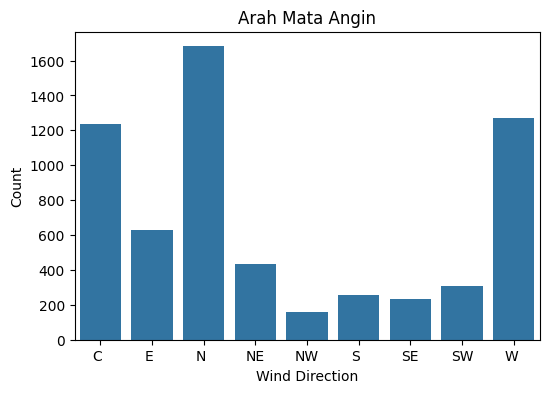

In [10]:
# visualisasi jumlah nilai unik tiap arah mata angin
fig2 = plt.figure(figsize=(6,4))
sns.barplot(data=df_ddd_car_sum, x=df_ddd_car_sum['ddd_car'], y=df_ddd_car_sum['ddd_cnt'])
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.title('Arah Mata Angin')
plt.show()

Pada keempat kolom kategorikal 3 diantaranya memiliki nilai unik yang sama yakni 4. Ketiganya juga merupakan kolom kategori yang menunjukkan tempat atau wilayah pencatatan data. Namun apakah ketiganya itu merujuk pada satu tempat yang sama?


In [11]:
# Apakah stasiun dan region merupakan tempat yang sama?
df_region = df.groupby(['station_id', 'region_name', 'station_name'], as_index=0).agg(station_cnt=('station_id', 'count'))
df_region

station_id      region_name                               station_name  \
0       96733  Jakarta Selatan                 Stasiun Klimatologi Banten   
1       96741    Jakarta Utara  Stasiun Meteorologi Maritim Tanjung Priok   
2       96745    Jakarta Pusat              Stasiun Meteorologi Kemayoran   
3       96747    Jakarta Timur               Halim Perdana Kusuma Jakarta   

   station_cnt  
0         1658  
1         1779  
2         1814  
3         1057

In [12]:
# mengecek jumlah stasiun pada grouping apakah telah sama dengan dataset
df_region['station_cnt'].sum()

6308

Dari nilai jumlah diatas menunjukkan bahwa di dalam dataset ini hanya terdapat 4 jumlah stasiun saja. Untuk lebih jelasnya lagi bisa dilihat dalam visualisasi data berikut :

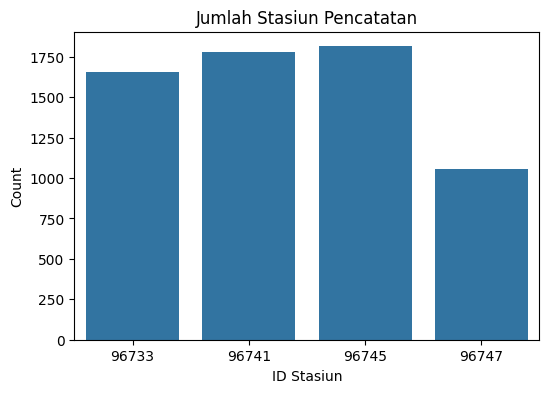

In [13]:
# Jumlah masing-masing stasiun ataupun daerah pencatatan
fig2 = plt.figure(figsize=(6, 4))
sns.barplot(data=df_region, x=df_region['station_id'], y=df_region['station_cnt'])
plt.xlabel('ID Stasiun')
plt.ylabel('Count')
plt.title('Jumlah Stasiun Pencatatan')
plt.show()

Setelah ditelusuri ternyata pada dataset hanya digabung bukan sesuai urutan tahun tetapi urutan stasiun. Sehingga index pertama hingga index ke-1658 adalah stasiun klimatologi banten yang berada di Jakarta Selatan kemudian seterusnya hingga stasiun terakhir. Hal ini bisa dilihat pada rentang pada dataset adalah sama yaitu dari tahun 2016-2020, namun panjang data tiap stasiun tidak sama.

### Eksplorasi Data Target (Flood)

Eksplorasi ini bertujuan untuk mengetahui apakah terjadi ketidakseimbangan jumlah data target dimana banjir dan tidak

In [14]:
# membuat grouping untuk mengetahui jumlah masing-masing kategori dan untuk bisa divisualisasikan
df_flood_sum = df.groupby('flood').agg(cat_cnt=('flood', 'count'))
df_flood_sum

cat_cnt
flood         
0         5832
1          476

Berdasarkan data grouping bisa diketahui kasus dimana tidak banjir ada sebanyak 5832 kasus, sedangkan kasus banjir ada sebanyak 476 kasus

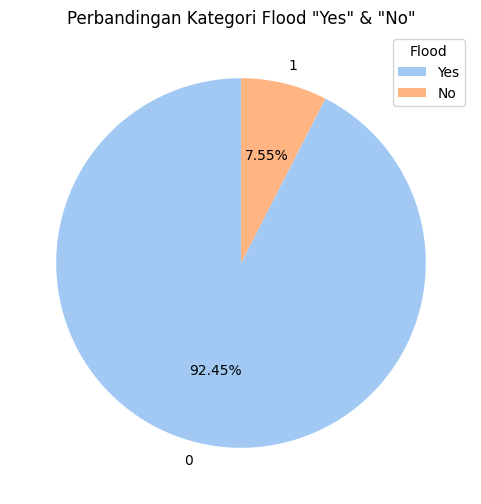

In [15]:
# visualisasi perbandingan kategori banjir dan tidak banjir
colors = sns.color_palette("pastel")

plt.figure(figsize=(6, 6))
plt.pie(df_flood_sum['cat_cnt'], labels=df_flood_sum.index, startangle=90, autopct='%1.2f%%', colors=colors)
plt.title('Perbandingan Kategori Flood "Yes" & "No"')

plt.legend(title='Flood', labels=['Yes', 'No'], loc='upper right')
plt.show()


Dari visualisasi diatas bisa disimpulkan juga terjadi ketimpangan label kategori yang mana kategori 0 atau tidak banjir memiliki jumlah yang lebih banyak

### Data yang hilang

In [16]:
df.isna().sum()

date               0
Tn               312
Tx               213
Tavg              46
RH_avg            52
RR              2315
ss              1259
ff_x              22
ddd_x             22
ff_avg            93
ddd_car          101
station_id         0
station_name       0
region_name        0
flood              0
dtype: int64

Kolom curah hujan merupakan kolom dengan missing values terbanyak. Lalu kami berasumsi apakah data yang hilang ini memiliki pola tersendiri. Asumsi awal adalah tidak dilakukan pencatatan saat musim kemarau. Maka dari itu seharusnya data yang hilang paling banyak ada pada sekitar bulan April-September.

In [17]:
df['date'] = pd.to_datetime(df['date'])
df_copy = df.copy()
df_copy['month'] = df['date'].dt.month

In [18]:
null_counts = df_copy[df_copy['RR'].isnull()].groupby('month').size()
null_counts

month
1     123
2      97
3     127
4     170
5     220
6     223
7     274
8     269
9     248
10    205
11    164
12    195
dtype: int64

Text(0.5, 1.0, 'Jumlah NaN Tiap Bulan')

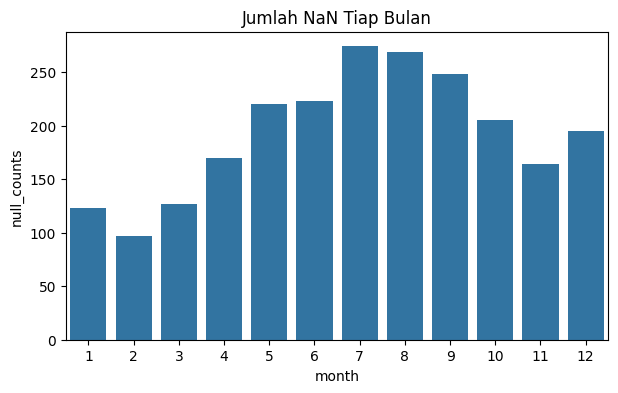

In [19]:
fig = plt.figure(figsize=(7,4))
sns.barplot(x=null_counts.index, y=null_counts)
plt.xlabel('month')
plt.ylabel('null_counts')
plt.title('Jumlah NaN Tiap Bulan')

Dari visualisasi di atas bisa disimpulkan bahwa nilai NaN paling sering ada di bulan-bulan Juni dan Juli yaitu lebih dari 250 nilai.

### Outliers

Memeriksa outliers dari Tx,Tavg,RH_avg,ss,ff_x, ddd_x

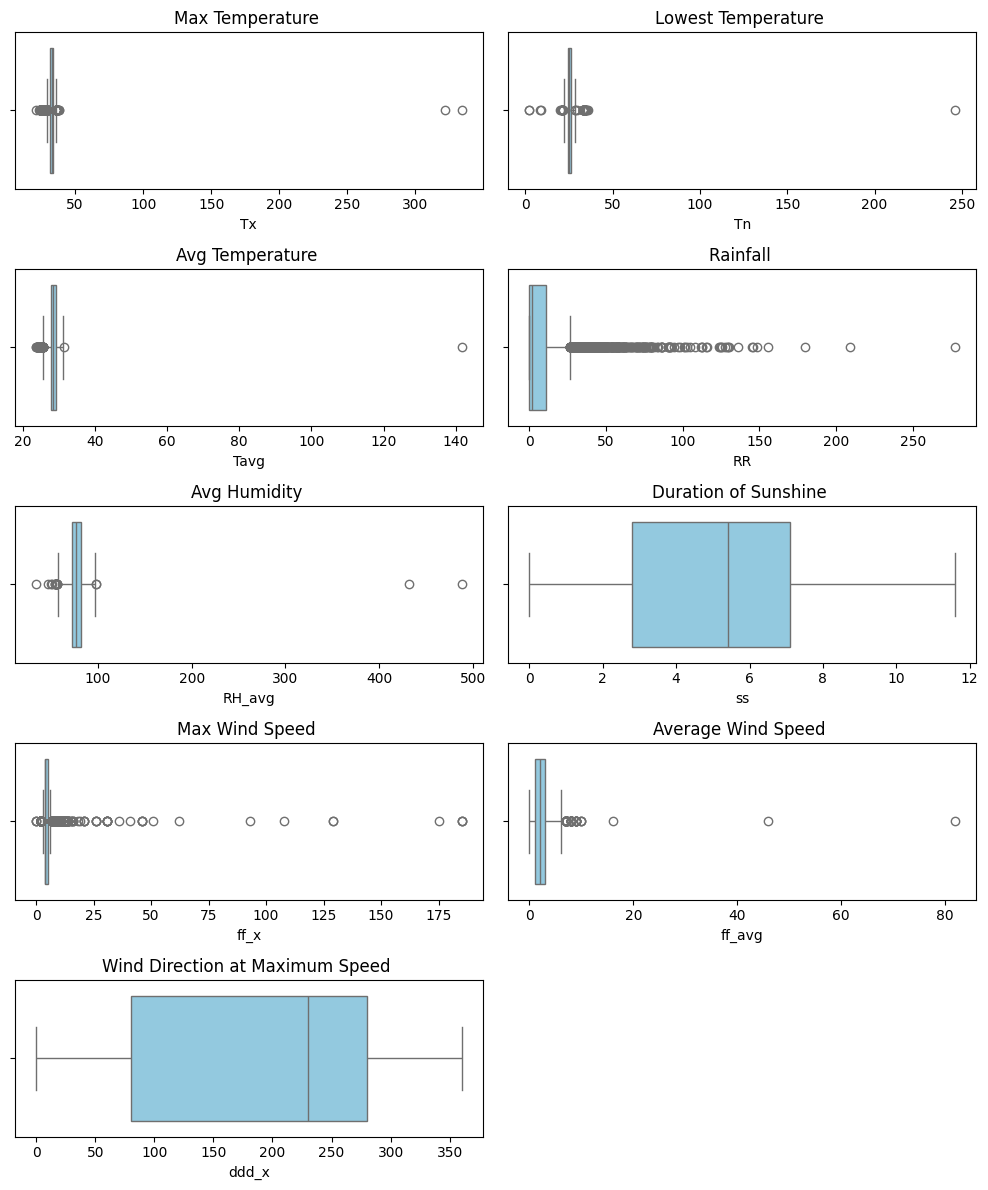

In [20]:
judul = {
    'Tx': 'Max Temperature ',
    'Tn': 'Lowest Temperature ',
    'Tavg': 'Avg Temperature ',
    'RR': 'Rainfall ',
    'RH_avg': 'Avg Humidity ',
    'ss': 'Duration of Sunshine ',
    'ff_x': 'Max Wind Speed ',
    'ff_avg': 'Average Wind Speed ',
    'ddd_x': 'Wind Direction at Maximum Speed '
}

fitur = ['Tx', 'Tn',  'Tavg', 'RR', 'RH_avg', 'ss', 'ff_x', 'ff_avg', 'ddd_x']

plt.figure(figsize=(10, 12))
n_cols = 2
n_rows = 5

# Membuat boxplot untuk setiap fitur menggunakan loop
for i, col in enumerate(fitur, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=col, data=df, color='skyblue')
    plt.title(f'{judul[col]}')  
    plt.ylabel('')

plt.tight_layout()
plt.show()

Untuk lebih jelasnya lagi mengenai distribusi data, kami membuat visualisasi scatter dibawah ini

In [21]:
def plot_weather_data(df, x_column, y_column, title, x_label, y_label):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_column], df[y_column]) 
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45) 
    plt.grid(True)
    plt.tight_layout()
    plt.show()


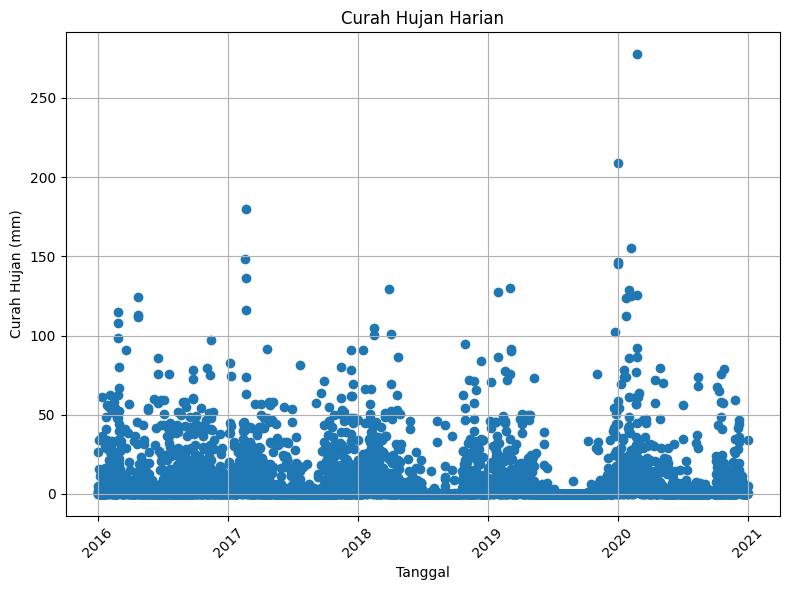

In [22]:
plot_weather_data(df, 'date', 'RR', 'Curah Hujan Harian', 'Tanggal', 'Curah Hujan (mm)')

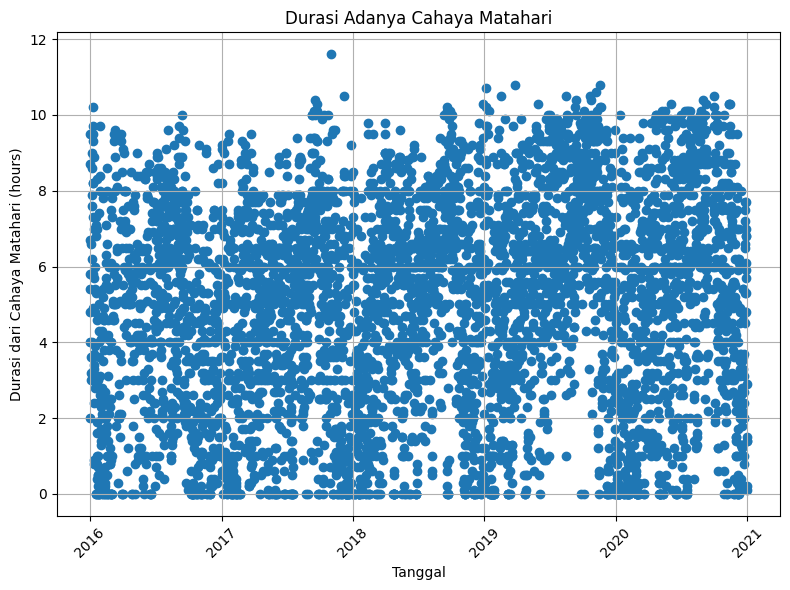

In [23]:
plot_weather_data(df, 'date', 'ss', 'Durasi Adanya Cahaya Matahari', 'Tanggal', 'Durasi dari Cahaya Matahari (hours)')

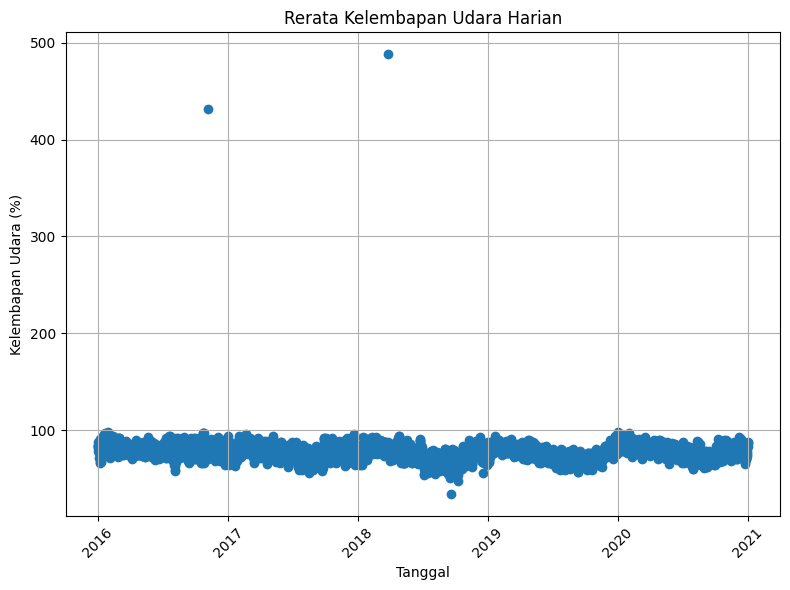

In [24]:
plot_weather_data(df, 'date', 'RH_avg', 'Rerata Kelembapan Udara Harian', 'Tanggal', 'Kelembapan Udara (%)')

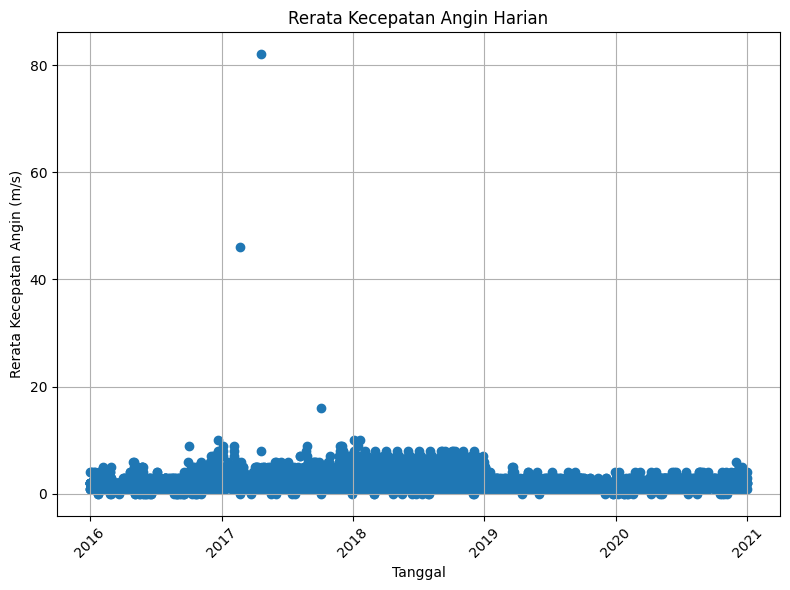

In [25]:
plot_weather_data(df, 'date', 'ff_avg', 'Rerata Kecepatan Angin Harian', 'Tanggal', 'Rerata Kecepatan Angin (m/s)')

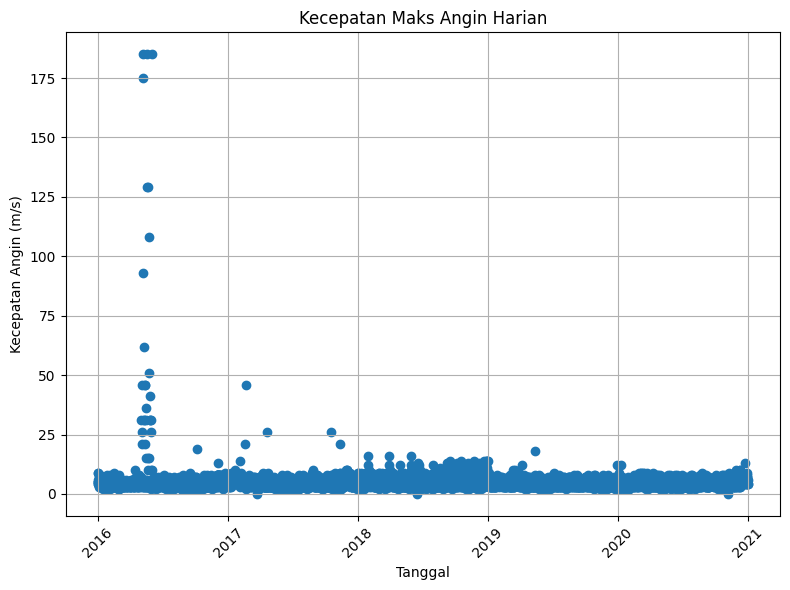

In [26]:
plot_weather_data(df, 'date', 'ff_x', 'Kecepatan Maks Angin Harian', 'Tanggal', 'Kecepatan Angin (m/s)')

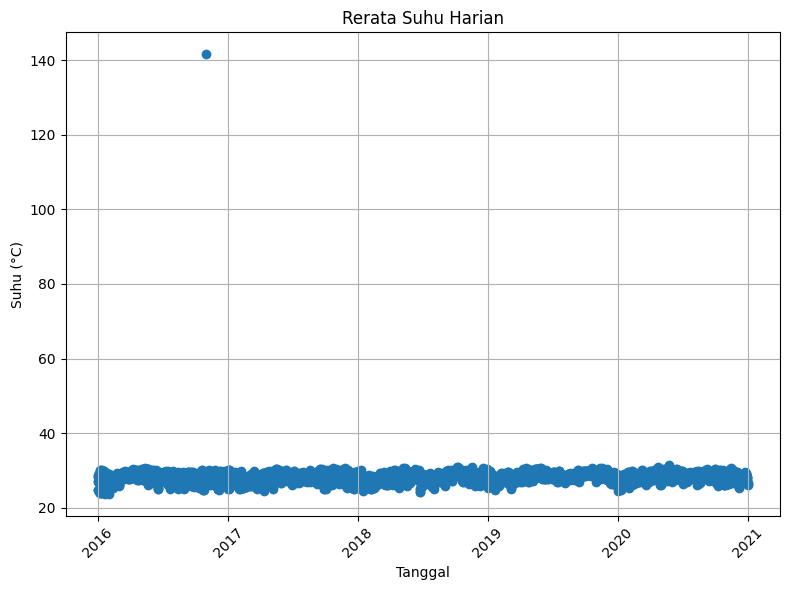

In [27]:
plot_weather_data(df, 'date', 'Tavg', 'Rerata Suhu Harian', 'Tanggal', 'Suhu (°C)')

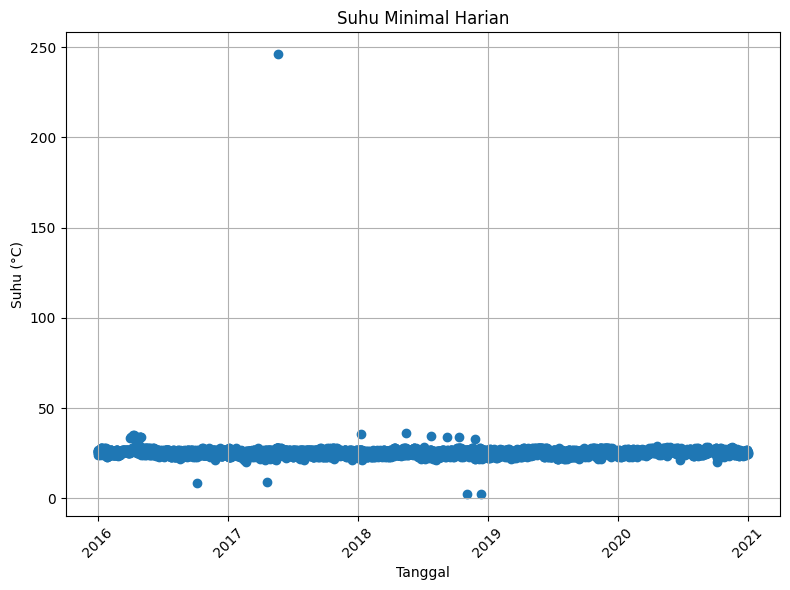

In [28]:
plot_weather_data(df, 'date', 'Tn', 'Suhu Minimal Harian', 'Tanggal', 'Suhu (°C)')

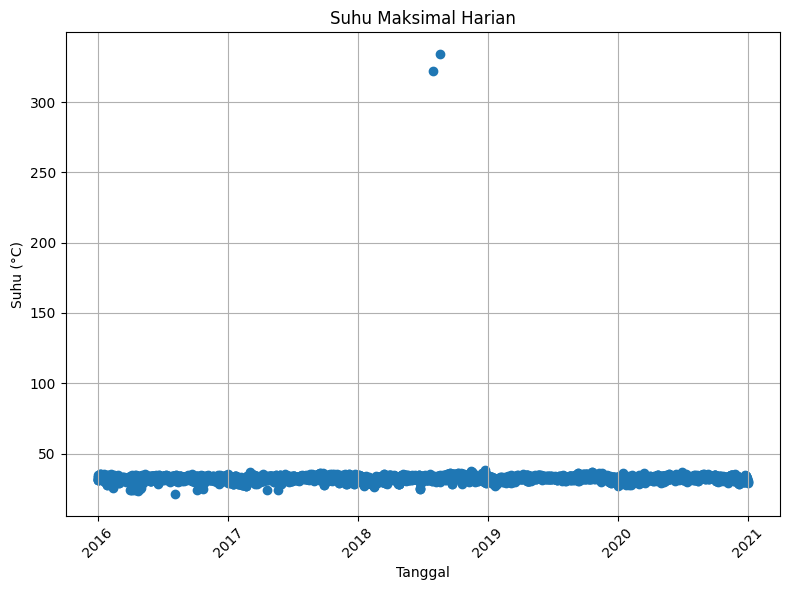

In [29]:
plot_weather_data(df, 'date', 'Tx', 'Suhu Maksimal Harian', 'Tanggal', 'Suhu (°C)')

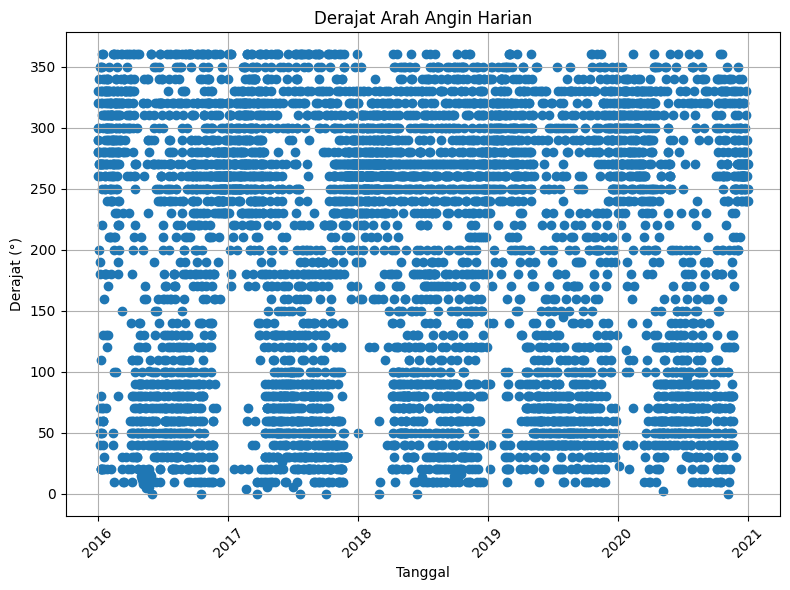

In [30]:
plot_weather_data(df, 'date', 'ddd_x', 'Derajat Arah Angin Harian', 'Tanggal', 'Derajat (°)')

Korelasi antar kolom numerik

In [31]:
num_cols = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_avg', 'ddd_x']

<Axes: >

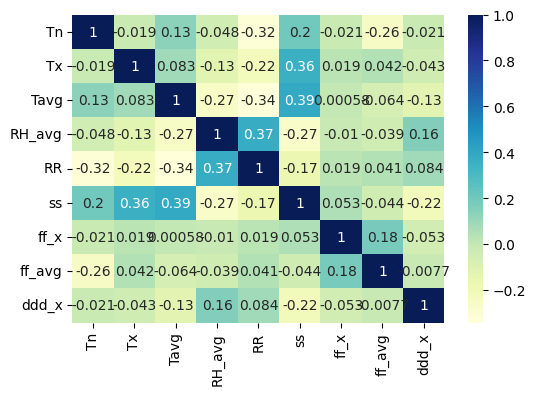

In [32]:
fig = plt.figure(figsize=(6, 4))
sns.heatmap(df[num_cols].corr(), cmap='YlGnBu', annot=True)

## Data Preprocessing (Klasifikasi)

### Handling Data & Outliers

Jadi pada penanganan data kali ini, setelah kami melakukan percobaan dengan metode lain. Kami menemukan bahwa berikut adalah metode terbaik yang telah kami coba.
- Outliers = z-score (semua kolom numerik selain Curah Hujan)
- NaN Numerik = Interpolasi
- NaN Kategori = Modus

In [33]:
df_interpolate = df.copy()

In [34]:
num_cols = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
cat_cols = ['ddd_car', 'region_name']
target = ['flood']

kita menggunakan teknik interpolasi untuk mengatasi nilai Nan

In [35]:
df_interpolated = df_interpolate.interpolate(method='linear', axis=0)

In [36]:
df_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          6308 non-null   datetime64[ns]
 1   Tn            6308 non-null   float64       
 2   Tx            6308 non-null   float64       
 3   Tavg          6308 non-null   float64       
 4   RH_avg        6308 non-null   float64       
 5   RR            6307 non-null   float64       
 6   ss            6308 non-null   float64       
 7   ff_x          6308 non-null   float64       
 8   ddd_x         6308 non-null   float64       
 9   ff_avg        6308 non-null   float64       
 10  ddd_car       6207 non-null   object        
 11  station_id    6308 non-null   int64         
 12  station_name  6308 non-null   object        
 13  region_name   6308 non-null   object        
 14  flood         6308 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int6

In [37]:
dates = pd.date_range(start='2016-01-01', end='2020-12-31', freq='D')
df_interpolated = df.interpolate()

In [38]:
df_interpolated['RR'].fillna(df_interpolated['RR'].mean(), inplace=True)

In [39]:
df_interpolated[(df_interpolated['RR']<df['RR'].mean()) & (df['flood']==0)]

date    Tn    Tx  Tavg  RH_avg        RR    ss  ff_x  ddd_x  \
0    2016-01-01  26.0  34.8  28.6    81.0  9.239964   5.8   5.0  280.0   
5    2016-01-06  25.0  33.6  28.9    80.0  3.800000   3.6   4.0  190.0   
6    2016-01-07  25.2  35.6  30.0    78.0  5.083333   7.6   4.0   60.0   
7    2016-01-08  26.8  35.2  29.9    79.0  6.366667   7.9   4.0   50.0   
8    2016-01-09  26.8  34.8  29.7    79.0  7.650000  10.2   4.0  110.0   
...         ...   ...   ...   ...     ...       ...   ...   ...    ...   
6302 2018-12-26  24.0  29.4  26.1    80.0  0.400000   0.2   9.0  210.0   
6303 2018-12-27  23.8  32.0  28.0    70.0  2.300000   0.2  12.0  180.0   
6304 2018-12-28  24.0  33.4  28.5    69.0  4.200000   0.2  14.0  250.0   
6305 2018-12-29  25.2  33.4  28.7    70.0  6.100000   0.2  14.0  120.0   
6306 2018-12-30  24.0  34.4  30.0    64.0  8.000000   0.2  14.0  240.0   

      ff_avg ddd_car  station_id                  station_name  \
0        2.0      S        96733    Stasiun Klimatologi Banten   
5        2.0      E        96733    Stasiun Klimatologi Banten   
6        2.0      E        96733    Stasiun Klimatologi Banten   
7        2.0      SE       96733    Stasiun Klimatologi Banten   
8        2.0      E        96733    Stasiun Klimatologi Banten   
...      ...     ...         ...                           ...   
6302     4.0      S        96747  Halim Perdana Kusuma Jakarta   
6303     5.0      W        96747  Halim Perdana Kusuma Jakarta   
6304     3.0      SE       96747  Halim Perdana Kusuma Jakarta   
6305     5.0      SW       96747  Halim Perdana Kusuma Jakarta   
6306     5.0      W        96747  Halim Perdana Kusuma Jakarta   

          region_name  flood  
0     Jakarta Selatan      0  
5     Jakarta Selatan      0  
6     Jakarta Selatan      0  
7     Jakarta Selatan      0  
8     Jakarta Selatan      0  
...               ...    ...  
6302    Jakarta Timur      0  
6303    Jakarta Timur      0  
6304    Jakarta Timur      0  
6305    Jakarta Timur      0  
6306    Jakarta Timur      0  

[4363 rows x 15 columns]

<Axes: >

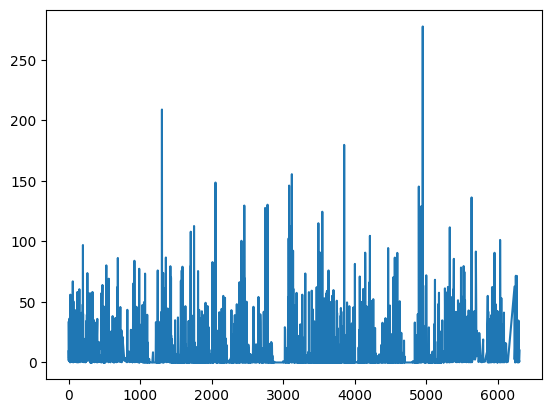

In [40]:
df_interpolated['RR'].plot()

<Axes: >

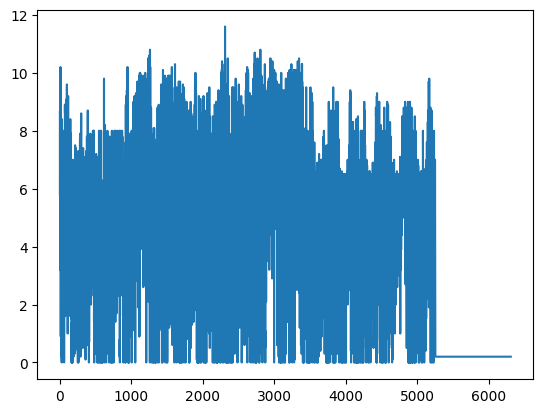

In [41]:
df_interpolated['ss'].plot()

In [42]:
df_interpolated['ddd_car'].fillna(df_interpolated['ddd_car'].mode()[0], inplace=True)

In [43]:
df_interpolated

date    Tn    Tx  Tavg  RH_avg         RR   ss  ff_x  ddd_x  \
0    2016-01-01  26.0  34.8  28.6    81.0   9.239964  5.8   5.0  280.0   
1    2016-01-02  25.6  33.2  27.0    88.0   1.600000  8.7   4.0  290.0   
2    2016-01-03  24.4  34.9  28.1    80.0  33.800000  5.4   4.0  280.0   
3    2016-01-04  24.8  33.6  29.2    81.0  23.800000  6.6   3.0  200.0   
4    2016-01-05  25.8  33.6  26.7    91.0  13.800000  3.2   3.0  180.0   
...         ...   ...   ...   ...     ...        ...  ...   ...    ...   
6303 2018-12-27  23.8  32.0  28.0    70.0   2.300000  0.2  12.0  180.0   
6304 2018-12-28  24.0  33.4  28.5    69.0   4.200000  0.2  14.0  250.0   
6305 2018-12-29  25.2  33.4  28.7    70.0   6.100000  0.2  14.0  120.0   
6306 2018-12-30  24.0  34.4  30.0    64.0   8.000000  0.2  14.0  240.0   
6307 2018-12-31  25.4  32.8  28.2    69.0   9.900000  0.2  14.0  180.0   

      ff_avg ddd_car  station_id                  station_name  \
0        2.0      S        96733    Stasiun Klimatologi Banten   
1        2.0      W        96733    Stasiun Klimatologi Banten   
2        2.0      SW       96733    Stasiun Klimatologi Banten   
3        1.0      S        96733    Stasiun Klimatologi Banten   
4        1.0      S        96733    Stasiun Klimatologi Banten   
...      ...     ...         ...                           ...   
6303     5.0      W        96747  Halim Perdana Kusuma Jakarta   
6304     3.0      SE       96747  Halim Perdana Kusuma Jakarta   
6305     5.0      SW       96747  Halim Perdana Kusuma Jakarta   
6306     5.0      W        96747  Halim Perdana Kusuma Jakarta   
6307     5.0      SE       96747  Halim Perdana Kusuma Jakarta   

          region_name  flood  
0     Jakarta Selatan      0  
1     Jakarta Selatan      1  
2     Jakarta Selatan      1  
3     Jakarta Selatan      0  
4     Jakarta Selatan      0  
...               ...    ...  
6303    Jakarta Timur      0  
6304    Jakarta Timur      0  
6305    Jakarta Timur      0  
6306    Jakarta Timur      0  
6307    Jakarta Timur      0  

[6308 rows x 15 columns]

In [44]:
df_interpolated.isna().sum()

date            0
Tn              0
Tx              0
Tavg            0
RH_avg          0
RR              0
ss              0
ff_x            0
ddd_x           0
ff_avg          0
ddd_car         0
station_id      0
station_name    0
region_name     0
flood           0
dtype: int64

In [45]:
df_interpolated.columns[1:9]

Index(['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x'], dtype='object')

In [46]:
def plot_boxplots(data, features, titles, ncols=2, figsize=(10, 12)):
    nrows = - (- len(features) // ncols)  # Pembulatan ke atas untuk mendapatkan jumlah baris

    plt.figure(figsize=figsize)

    for i, feature in enumerate(features, 1):
        plt.subplot(nrows, ncols, i)
        sns.boxplot(x=feature, data=data, color='skyblue')
        plt.title(titles[feature])
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
judul = {
    'Tx': 'Max Temperature',
    'Tn': 'Lowest Temperature',
    'Tavg': 'Avg Temperature',
    'RR': 'Rainfall',
    'RH_avg': 'Avg Humidity',
    'ss': 'Duration of Sunshine',
    'ff_x': 'Max Wind Speed',
    'ff_avg': 'Average Wind Speed',
    'ddd_x': 'Wind Direction at Maximum Speed'
}

fitur = ['Tx', 'Tn', 'Tavg','RR', 'RH_avg', 'ss', 'ff_x', 'ff_avg', 'ddd_x']

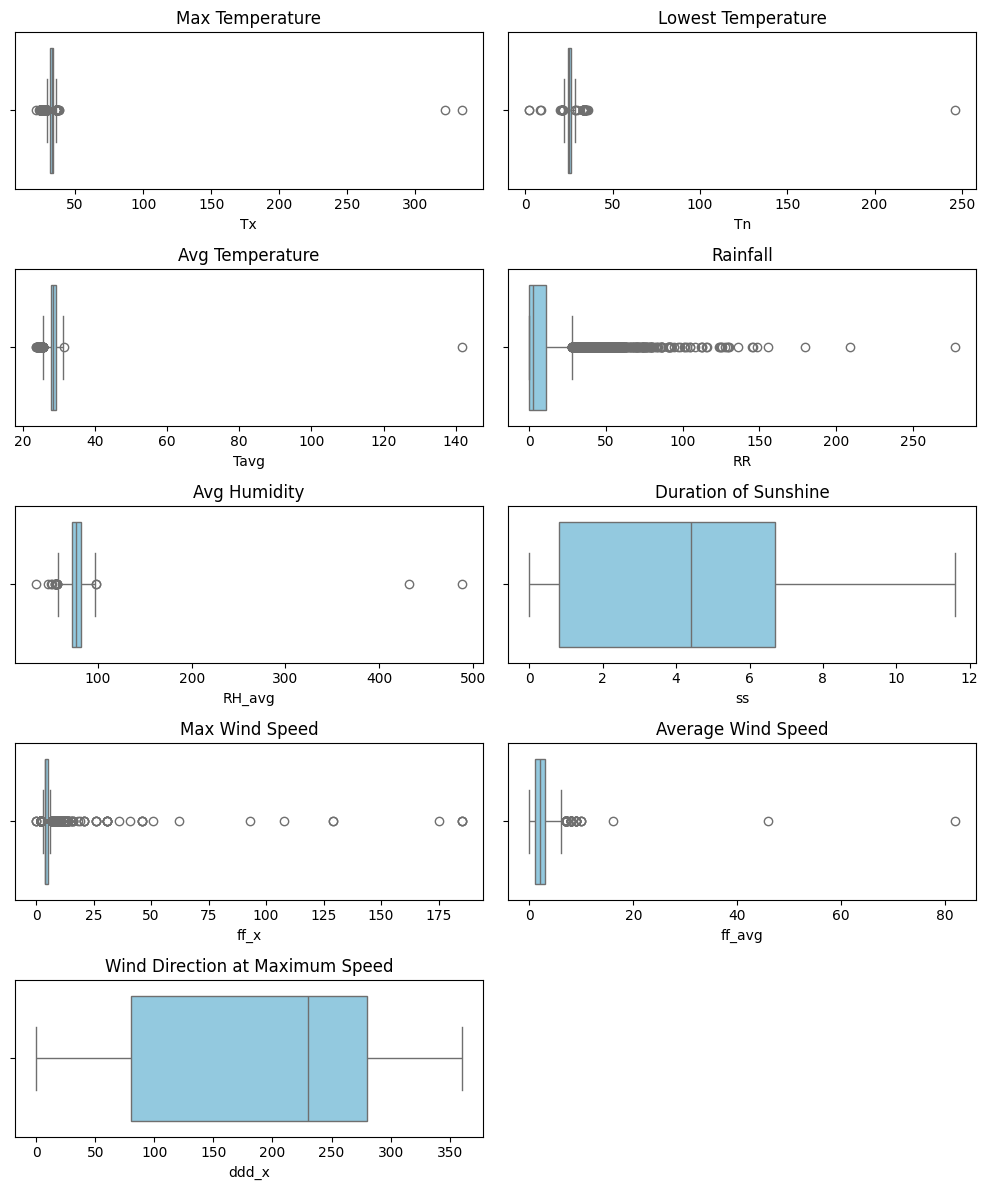

In [47]:
plot_boxplots(df_interpolated, fitur, judul)

In [48]:
def handle_outliers_zscore(df_input, threshold=3):
    
    feature_list = df_input.columns
    for feature in feature_list:
        z_scores = np.abs((df_input - df_input.mean()) / df_input.std())
        df_outliers = df.mask(z_scores > threshold)
    return df_outliers


In [49]:
df_interpolated.columns

Index(['date', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x',
       'ff_avg', 'ddd_car', 'station_id', 'station_name', 'region_name',
       'flood'],
      dtype='object')

In [50]:
num_outliers = df_interpolated[['Tn', 'Tx', 'Tavg', 'RH_avg','ss', 'ff_x', 'ddd_x', 'ff_avg']]
df_noutliers = handle_outliers_zscore(num_outliers)

kita menggunakan filter zscore untuk mengatasi outliers yang ada. Tapi kita tidak memfilter fitur RR karena RR merupakan natural outliers


In [51]:
df_noutliers

date    Tn    Tx  Tavg  RH_avg  RR   ss  ff_x  ddd_x  ff_avg ddd_car  \
0     NaT  26.0  34.8  28.6    81.0 NaN  5.8   5.0  280.0     2.0     NaN   
1     NaT  25.6  33.2  27.0    88.0 NaN  8.7   4.0  290.0     2.0     NaN   
2     NaT  24.4  34.9  28.1    80.0 NaN  5.4   4.0  280.0     2.0     NaN   
3     NaT  24.8  33.6  29.2    81.0 NaN  6.6   3.0  200.0     1.0     NaN   
4     NaT  25.8  33.6  26.7    91.0 NaN  3.2   3.0  180.0     1.0     NaN   
...   ...   ...   ...   ...     ...  ..  ...   ...    ...     ...     ...   
6303  NaT  23.8  32.0  28.0    70.0 NaN  NaN  12.0  180.0     5.0     NaN   
6304  NaT  24.0  33.4  28.5    69.0 NaN  NaN  14.0  250.0     3.0     NaN   
6305  NaT  25.2  33.4  28.7    70.0 NaN  NaN  14.0  120.0     5.0     NaN   
6306  NaT  24.0  34.4  30.0    64.0 NaN  NaN  14.0  240.0     5.0     NaN   
6307  NaT  25.4  32.8  28.2    69.0 NaN  NaN  14.0  180.0     5.0     NaN   

      station_id station_name region_name  flood  
0            NaN          NaN         NaN    NaN  
1            NaN          NaN         NaN    NaN  
2            NaN          NaN         NaN    NaN  
3            NaN          NaN         NaN    NaN  
4            NaN          NaN         NaN    NaN  
...          ...          ...         ...    ...  
6303         NaN          NaN         NaN    NaN  
6304         NaN          NaN         NaN    NaN  
6305         NaN          NaN         NaN    NaN  
6306         NaN          NaN         NaN    NaN  
6307         NaN          NaN         NaN    NaN  

[6308 rows x 15 columns]

In [52]:
df_noutliers.isna().sum()

date            6308
Tn               320
Tx               215
Tavg              47
RH_avg            56
RR              6308
ss              1259
ff_x              49
ddd_x             22
ff_avg           132
ddd_car         6308
station_id      6308
station_name    6308
region_name     6308
flood           6308
dtype: int64

In [53]:
df_num_noutliers = df_noutliers.drop(columns=['date','RR', 'ddd_car', 'station_id', 'station_name', 'region_name', 'flood'])

In [54]:
df_num_noutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tn      5988 non-null   float64
 1   Tx      6093 non-null   float64
 2   Tavg    6261 non-null   float64
 3   RH_avg  6252 non-null   float64
 4   ss      5049 non-null   float64
 5   ff_x    6259 non-null   float64
 6   ddd_x   6286 non-null   float64
 7   ff_avg  6176 non-null   float64
dtypes: float64(8)
memory usage: 394.4 KB


In [55]:
df_interpolated_2 = df_num_noutliers.interpolate(method='linear', axis=0)

### Menyiapkan Data untuk Model

Gabungkan semua fitur-fitur yang sudah di handling menjadi satu

In [56]:
df_cleaned = pd.concat([df['date'], df_interpolated_2, df_interpolated['RR'], df_interpolated[cat_cols], df_interpolated['flood']], axis=1)

In [57]:
df_cleaned.head()

date    Tn    Tx  Tavg  RH_avg   ss  ff_x  ddd_x  ff_avg         RR  \
0 2016-01-01  26.0  34.8  28.6    81.0  5.8   5.0  280.0     2.0   9.239964   
1 2016-01-02  25.6  33.2  27.0    88.0  8.7   4.0  290.0     2.0   1.600000   
2 2016-01-03  24.4  34.9  28.1    80.0  5.4   4.0  280.0     2.0  33.800000   
3 2016-01-04  24.8  33.6  29.2    81.0  6.6   3.0  200.0     1.0  23.800000   
4 2016-01-05  25.8  33.6  26.7    91.0  3.2   3.0  180.0     1.0  13.800000   

  ddd_car      region_name  flood  
0      S   Jakarta Selatan      0  
1      W   Jakarta Selatan      1  
2      SW  Jakarta Selatan      1  
3      S   Jakarta Selatan      0  
4      S   Jakarta Selatan      0

In [58]:
df_cleaned['RR'].fillna(df_cleaned['RR'].median(), inplace=True)

In [59]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6308 non-null   datetime64[ns]
 1   Tn           6308 non-null   float64       
 2   Tx           6308 non-null   float64       
 3   Tavg         6308 non-null   float64       
 4   RH_avg       6308 non-null   float64       
 5   ss           6308 non-null   float64       
 6   ff_x         6308 non-null   float64       
 7   ddd_x        6308 non-null   float64       
 8   ff_avg       6308 non-null   float64       
 9   RR           6308 non-null   float64       
 10  ddd_car      6308 non-null   object        
 11  region_name  6308 non-null   object        
 12  flood        6308 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 640.8+ KB


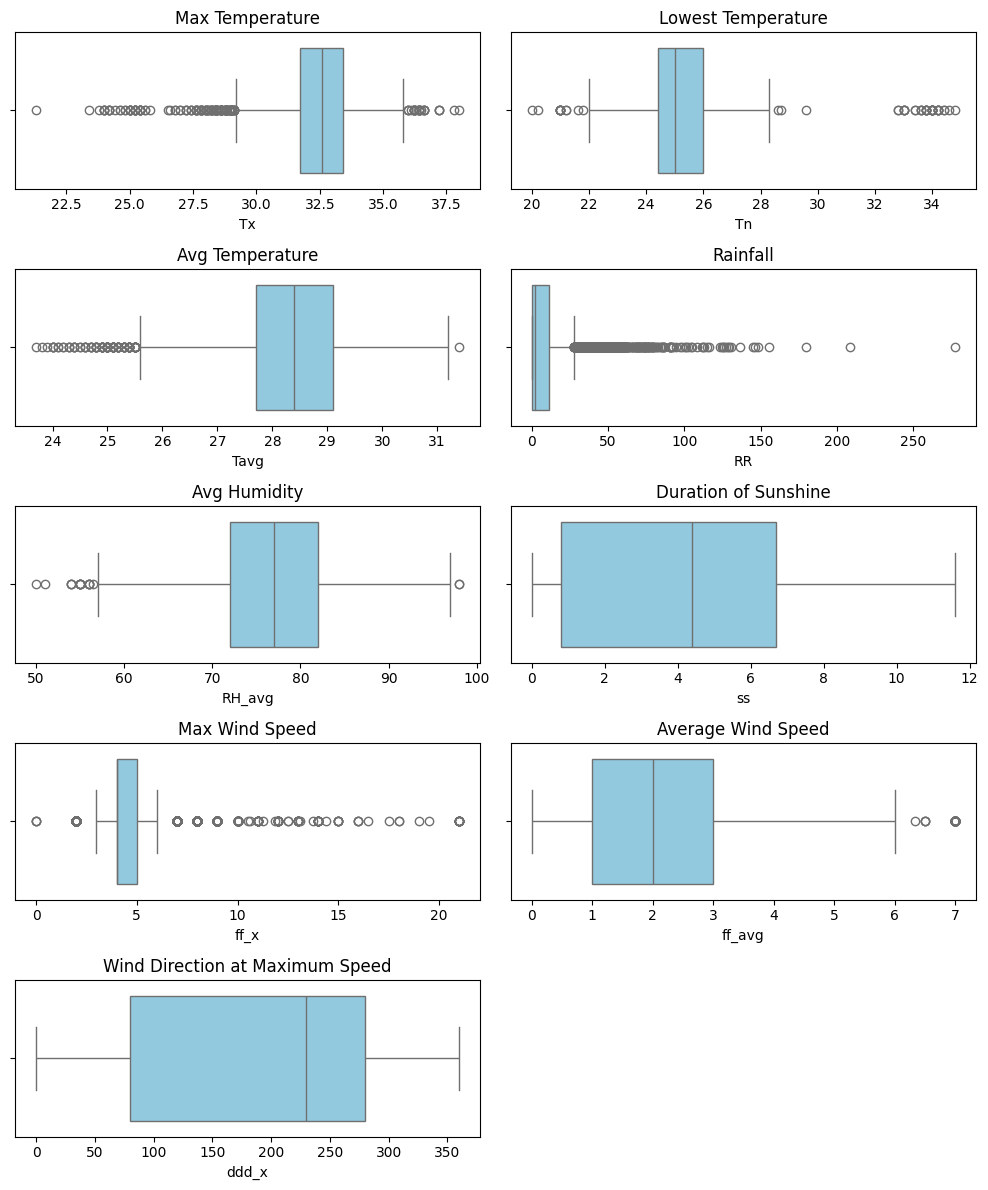

In [60]:
plot_boxplots(df_cleaned, fitur, judul)

In [61]:
df_klasifikasi = df_cleaned.copy()

In [62]:
df_target = df_klasifikasi['flood']

In [63]:
df_klasifikasi = df_klasifikasi.drop(['date', 'flood'], axis=1)

Menggunakan one-hot encoding untuk mengubah variabel kategorikal diubah menjadi biner

In [64]:
df_train_dumied = pd.get_dummies(df_klasifikasi, columns=['ddd_car', 'region_name'])

In [65]:
df_train_dumied.dtypes

Tn                             float64
Tx                             float64
Tavg                           float64
RH_avg                         float64
ss                             float64
ff_x                           float64
ddd_x                          float64
ff_avg                         float64
RR                             float64
ddd_car_C                         bool
ddd_car_E                         bool
ddd_car_N                         bool
ddd_car_NE                        bool
ddd_car_NW                        bool
ddd_car_S                         bool
ddd_car_SE                        bool
ddd_car_SW                        bool
ddd_car_W                         bool
region_name_Jakarta Pusat         bool
region_name_Jakarta Selatan       bool
region_name_Jakarta Timur         bool
region_name_Jakarta Utara         bool
dtype: object

Handling Imbalance Data

In [66]:
from imblearn.over_sampling import RandomOverSampler    
X = df_train_dumied
y = df_target

# Inisialisasi RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Melakukan oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Menampilkan jumlah sampel setelah oversampling
print("Jumlah sampel setelah oversampling:")
print(y_resampled.value_counts())

Jumlah sampel setelah oversampling:
flood
0    5832
1    5832
Name: count, dtype: int64


Kita menggunakan teknik oversampling karena kita ingin menaikan sample kejadian banjir, sedangkan kalau kita menggunakan undersampling malah membuat data kita semakin sedikit dan khawatirnya akan menurunkan peforma dari model

Pembagian dataset menjadi data latih dan data uji

In [67]:
from sklearn.model_selection import train_test_split

# Pembagian dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 9331
Jumlah data uji: 2333


## Feature Selection (Klasifikasi)

### Fitur seleksi dengan metode RFECV

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV


# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_1 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_1, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'RR',
       'ddd_car_N ', 'ddd_car_W ', 'region_name_Jakarta Pusat',
       'region_name_Jakarta Selatan', 'region_name_Jakarta Utara'],
      dtype='object')


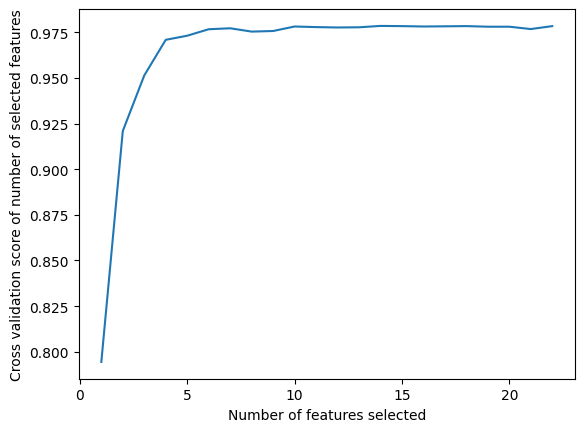

In [69]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

Pada RFECV kita bisa melihat bahwa ada 10 fitur terbaik.

### Elimination of Redundant Features

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9331 entries, 1297 to 7270
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tn                           9331 non-null   float64
 1   Tx                           9331 non-null   float64
 2   Tavg                         9331 non-null   float64
 3   RH_avg                       9331 non-null   float64
 4   ss                           9331 non-null   float64
 5   ff_x                         9331 non-null   float64
 6   ddd_x                        9331 non-null   float64
 7   ff_avg                       9331 non-null   float64
 8   RR                           9331 non-null   float64
 9   ddd_car_C                    9331 non-null   bool   
 10  ddd_car_E                    9331 non-null   bool   
 11  ddd_car_N                    9331 non-null   bool   
 12  ddd_car_NE                   9331 non-null   bool   
 13  ddd_car_NW          

Disini kita akan drop fitur-fitur yang sekiranya memberikan informasi yang sama untuk model.

Tn dan Tx kita drop karena Tavg(suhu rata-rata) sudah cukup untuk mewakili atau menggambarkan suhu pada suatu daerah.

ddd_car dan ff_x(kecepatan max angin) juga memiliki informasi yang serupa dengan ff_avg yaitu sama-sama memberikan informasi mengenai maks.

In [154]:
df_fitur_seleksi = df_klasifikasi

In [155]:
df_fitur_seleksi = df_fitur_seleksi.drop(['Tn', 'Tx', 'ddd_car','ff_x'], axis=1)


In [156]:
df_fitur_seleksi_dummied = pd.get_dummies(df_fitur_seleksi, columns=['region_name'], drop_first=True)

Mari kita lihat berapa nilai metrics tanpa melakukan oversampling terlebih dahulu

In [152]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

Accuracy: 0.904120443740095
F1 score: 0.032


<Axes: >

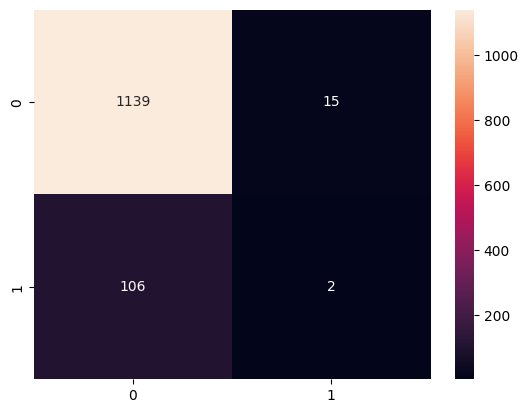

In [159]:
X = df_fitur_seleksi_dummied
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
rf = RandomForestClassifier(random_state=42)

# Training model
m1 = rf.fit(X_train, y_train)
    
# Predicting on test set
y_pred = m1.predict(X_test)
    
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
    
# Calculating F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)
    
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="g")

Metrik akurasi cukup baik, namun untuk f1_score terlalu buruk. Oleh karena itu selanjutnya kita akan split dan oversampling untuk mempersiapkan data kita yang akan kita latih dan uji pada model

In [160]:
X = df_fitur_seleksi_dummied
y = df_target

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Machine Learning (Klasifikasi)

### Modeling and Evaluation

Kita akan menggunakan evaluasi dengan melihat akurasi, f1_score dan juga confusion matrix

Fungsi dibawah ini untuk training model sekaligus evaluasi model

In [75]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training model
    model.fit(X_train, y_train)
    
    # Predicting on test set
    y_pred = model.predict(X_test)
    
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    # Calculating F1 score
    f1 = f1_score(y_test, y_pred)
    print("F1 score:", f1)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="g")

> **Model RandomForestClassifier**

Accuracy: 0.9794256322331761
F1 score: 0.9791666666666666


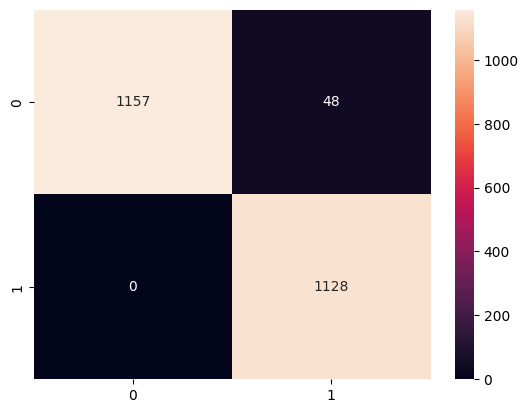

In [76]:
rf = RandomForestClassifier(random_state=42)
evaluate_model(rf, X_train, X_test, y_train, y_test)

Model ini memiliki performa sangat baik terutama saat kita melihat confusion matrix bahwa model ini dapat memprediksi kejadian banjir dengan sangat baik

> **Model XGBClassifier**

Accuracy: 0.9502786112301758
F1 score: 0.9509721048182587


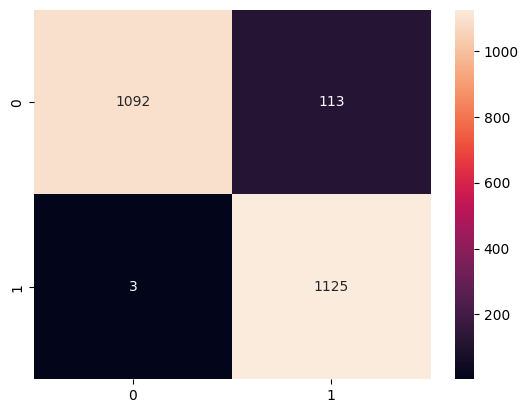

In [77]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
evaluate_model(xgb_classifier, X_train, X_test, y_train, y_test)

Model ini juga memiliki peforma yang baik dan bisa memprediksi kejadian banjir juga dengan sangat baik namun akurasinya sedikit dibawah RandomForestClassifier

> **Model Support Vector Classifier**

Accuracy: 0.7561080154307758
F1 score: 0.7550581145071029


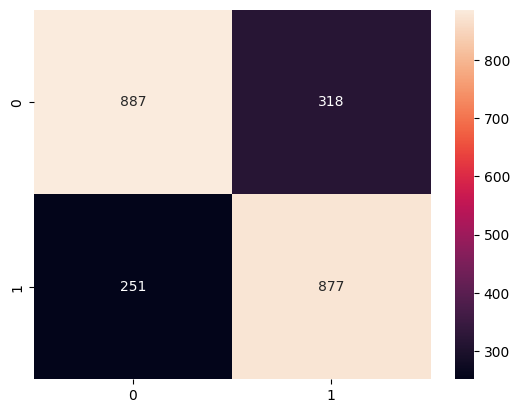

In [78]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=42)
evaluate_model(svc, X_train, X_test, y_train, y_test)



Bisa dilihat dan dibandingkan bahwa SVC memiliki peforma yang paling buruk diantar model yang lain. Meskipun SVC bisa memprediksi beberapa kejadian banjir namun masih kalah dengan model yang lain. Hal ini bisa dikarenakan SVC cenderung bekerja lebih baik saat data secara linier dapat dipisahkan dengan jelas.

### Hyperparameter Tuning for Random Forest Classification 

Accuracy: 0.9631375910844406
F1 score: 0.9632792485055508


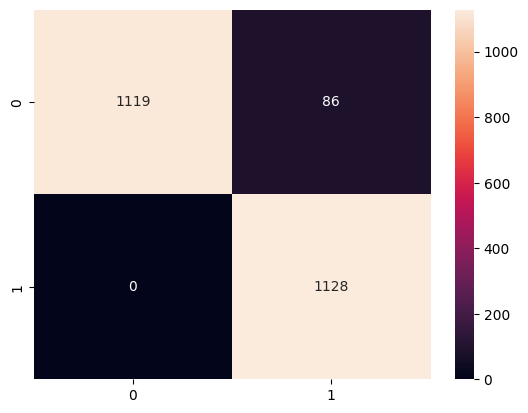

In [79]:
# n_estimators=50, max_depth=15, random_state=42
rf_tuning1 = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42)
evaluate_model(rf_tuning1, X_train, X_test, y_train, y_test)

Accuracy: 0.9627089584226318
F1 score: 0.9628681177976952


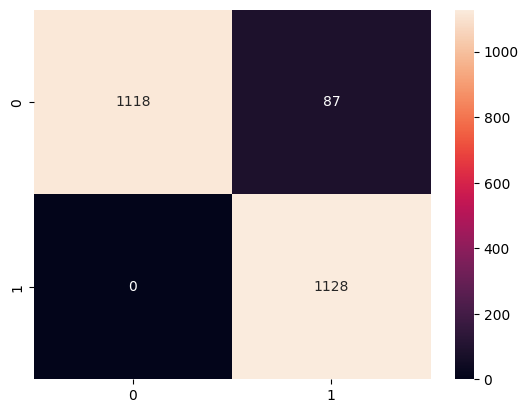

In [80]:
# n_estimators=100, max_depth=15, random_state=42
rf_tuning2 = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
evaluate_model(rf_tuning2, X_train, X_test, y_train, y_test)

Accuracy: 0.9802828975567939
F1 score: 0.9800173761946134


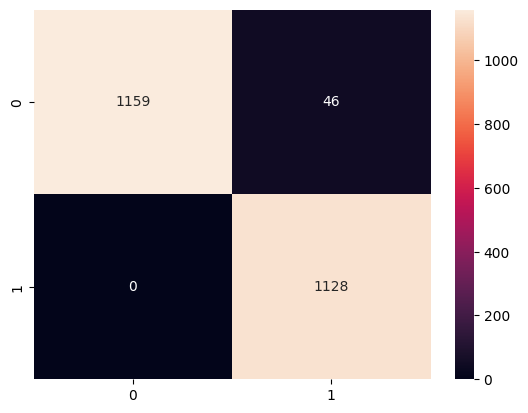

In [81]:
# n_estimators=100, max_depth=none, random_state=42
rf_tuning3 = RandomForestClassifier(n_estimators=150, max_depth=None, random_state=42)
evaluate_model(rf_tuning3, X_train, X_test, y_train, y_test)

Dari semua parameter yang kita coba, bisa kita lihat bahwa n_estimators=100, max_depth=none, dan random_state=42 merupakan parameter yang terbaik pada percobaan kita

## Conclusion (Klasifikasi)

-  Dari ketiga model di atas kita dapat menyimpulkan bahwa RandomForestClassifier memiliki performa paling baik selain itu juga f1 scorenya juga bagus yang menandakan bahwa model ini stabil dan dapat digunakan. Disusul oleh XBG Classifier dan terahkir SVM
- Jadi dari hasil prediksi model klasifikasi kita bahwa model kita dapat memprediksi dengan baik kejadian banjir berdasarkan aspek-aspek cuaca seperti curah hujan, suhu, kelembaban, kecepatan angin, durasi sinar matahari. 


# Time Series
___

In [82]:
# Siapkan beberapa library untuk Time Series
from jcopml.time_series import stationarity_tester
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

## EDA (Time Series)

Sebelum beranjak ke dalam modelling time series, ada satu masalah yang perlu diselesaikan yaitu hilangnya index pada tiap-tiap stasiun, untuk itu kami lakukan interpolasi pada index-index yang hilang tersebut

In [200]:
df_cleaned.set_index('date', inplace=True)

In [201]:
# Memisahkan data tiap-tiap stasiun
# Stasiun 1 = Jakarta Selatan
# Stasiun 2 = Jakarta Timur
# Stasiun 3 = Jakarta Utara
# Stasiun 4 = Jakarta Pusat
stasiun1 = df_cleaned[(df_cleaned['region_name']=='Jakarta Selatan')]
stasiun2 = df_cleaned[(df_cleaned['region_name']=='Jakarta Timur')]
stasiun3 = df_cleaned[(df_cleaned['region_name']=='Jakarta Utara')]
stasiun4 = df_cleaned[(df_cleaned['region_name']=='Jakarta Pusat')]

In [202]:
stasiun1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1658 entries, 2016-01-01 to 2020-12-31
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tn           1658 non-null   float64
 1   Tx           1658 non-null   float64
 2   Tavg         1658 non-null   float64
 3   RH_avg       1658 non-null   float64
 4   ss           1658 non-null   float64
 5   ff_x         1658 non-null   float64
 6   ddd_x        1658 non-null   float64
 7   ff_avg       1658 non-null   float64
 8   RR           1658 non-null   float64
 9   ddd_car      1658 non-null   object 
 10  region_name  1658 non-null   object 
 11  flood        1658 non-null   int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 168.4+ KB


In [203]:
stasiun1

Tn    Tx  Tavg  RH_avg   ss  ff_x  ddd_x  ff_avg         RR  \
date                                                                        
2016-01-01  26.0  34.8  28.6    81.0  5.8   5.0  280.0     2.0   9.239964   
2016-01-02  25.6  33.2  27.0    88.0  8.7   4.0  290.0     2.0   1.600000   
2016-01-03  24.4  34.9  28.1    80.0  5.4   4.0  280.0     2.0  33.800000   
2016-01-04  24.8  33.6  29.2    81.0  6.6   3.0  200.0     1.0  23.800000   
2016-01-05  25.8  33.6  26.7    91.0  3.2   3.0  180.0     1.0  13.800000   
...          ...   ...   ...     ...  ...   ...    ...     ...        ...   
2020-12-27  24.8  33.7  29.0    74.0  5.7   4.0  240.0     2.0   0.000000   
2020-12-28  25.4  32.8  28.1    77.0  6.8   5.0  240.0     3.0   0.050000   
2020-12-29  24.8  30.8  27.1    82.0  6.1   7.0  240.0     3.0   0.100000   
2020-12-30  24.6  30.8  27.0    81.0  1.4   4.0  260.0     2.0   0.300000   
2020-12-31  24.4  29.8  26.4    88.0  0.1   4.0  250.0     2.0   0.500000   

           ddd_car      region_name  flood  
date                                        
2016-01-01      S   Jakarta Selatan      0  
2016-01-02      W   Jakarta Selatan      1  
2016-01-03      SW  Jakarta Selatan      1  
2016-01-04      S   Jakarta Selatan      0  
2016-01-05      S   Jakarta Selatan      0  
...            ...              ...    ...  
2020-12-27      SW  Jakarta Selatan      0  
2020-12-28      SW  Jakarta Selatan      0  
2020-12-29      SW  Jakarta Selatan      0  
2020-12-30      W   Jakarta Selatan      0  
2020-12-31      SW  Jakarta Selatan      0  

[1658 rows x 12 columns]

In [170]:
panjang_index_stasiun = [stasiun1.shape[0], stasiun2.shape[0], stasiun3.shape[0], stasiun4.shape[0]]
cat = ['Jaksel', 'Jaktim', 'Jakut', 'Jakpus']

<BarContainer object of 4 artists>

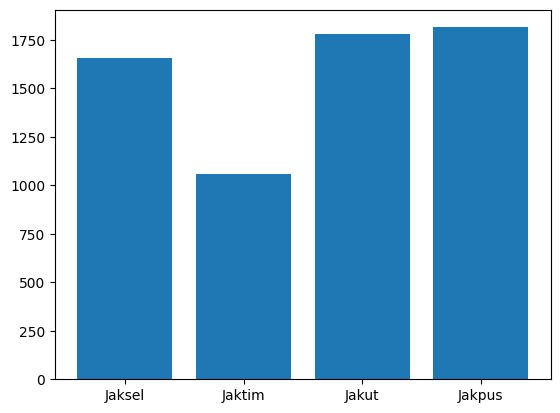

In [171]:
# visualisasi ukuran data atau record tiap stasiun
plt.bar(cat, panjang_index_stasiun)

In [205]:
# create new index
new_index = pd.date_range(start=stasiun1.index.min(), end=stasiun1.index.max(), freq='D')
new_index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=1827, freq='D')

In [206]:
num_cols = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

In [211]:
# reindexing
stasiun_1_reindex = stasiun1.reindex(new_index)
stasiun_2_reindex = stasiun1.reindex(new_index)
stasiun_3_reindex = stasiun1.reindex(new_index)
stasiun_4_reindex = stasiun1.reindex(new_index)

# interpolate time!!
stasiun_1_intrp = stasiun_1_reindex[num_cols].interpolate(method='linear')
stasiun_2_intrp = stasiun_2_reindex[num_cols].interpolate(method='linear')
stasiun_3_intrp = stasiun_3_reindex[num_cols].interpolate(method='linear')
stasiun_4_intrp = stasiun_4_reindex[num_cols].interpolate(method='linear')


In [214]:
# check
stasiun_1_intrp

Tn    Tx  Tavg  RH_avg         RR   ss  ff_x  ddd_x  ff_avg
2016-01-01  26.0  34.8  28.6    81.0   9.239964  5.8   5.0  280.0     2.0
2016-01-02  25.6  33.2  27.0    88.0   1.600000  8.7   4.0  290.0     2.0
2016-01-03  24.4  34.9  28.1    80.0  33.800000  5.4   4.0  280.0     2.0
2016-01-04  24.8  33.6  29.2    81.0  23.800000  6.6   3.0  200.0     1.0
2016-01-05  25.8  33.6  26.7    91.0  13.800000  3.2   3.0  180.0     1.0
...          ...   ...   ...     ...        ...  ...   ...    ...     ...
2020-12-27  24.8  33.7  29.0    74.0   0.000000  5.7   4.0  240.0     2.0
2020-12-28  25.4  32.8  28.1    77.0   0.050000  6.8   5.0  240.0     3.0
2020-12-29  24.8  30.8  27.1    82.0   0.100000  6.1   7.0  240.0     3.0
2020-12-30  24.6  30.8  27.0    81.0   0.300000  1.4   4.0  260.0     2.0
2020-12-31  24.4  29.8  26.4    88.0   0.500000  0.1   4.0  250.0     2.0

[1827 rows x 9 columns]

Semua stasiun sudah kita handle missing indexnya. Lalu stasiun mana yang akan kami pilih atau prioritaskan terlebih dahulu? Kami akan memprioritaskan stasiun dengan jumlah kasus banjir terbanyak

In [216]:
count_flood1 = df_cleaned[(df_cleaned['region_name']=='Jakarta Selatan')&(df_cleaned['flood']==1)].shape[0]
count_flood2 = df_cleaned[(df_cleaned['region_name']=='Jakarta Timur')&(df_cleaned['flood']==1)].shape[0]
count_flood3 = df_cleaned[(df_cleaned['region_name']=='Jakarta Utara')&(df_cleaned['flood']==1)].shape[0]
count_flood4 = df_cleaned[(df_cleaned['region_name']=='Jakarta Pusat')&(df_cleaned['flood']==1)].shape[0]

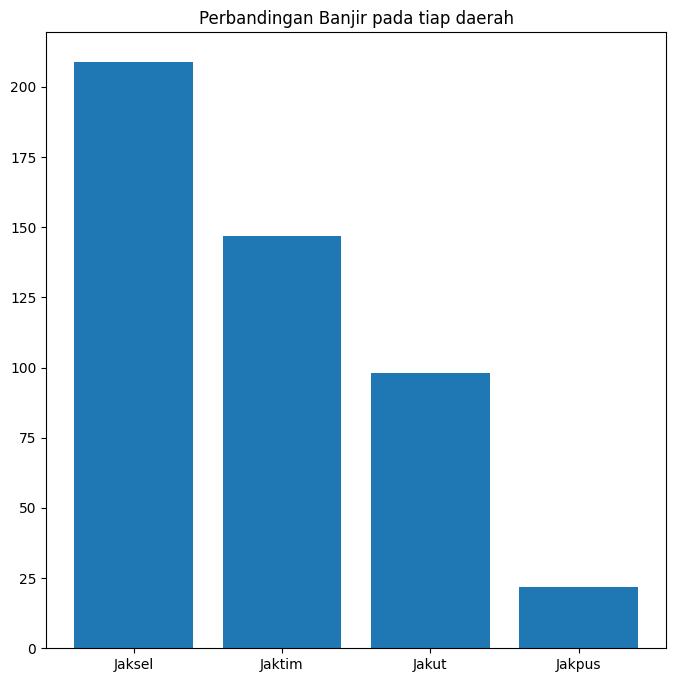

In [225]:
# Data untuk pie chart
sizes = [count_flood1, count_flood2, count_flood3, count_flood4]
labels = cat
colors = ['red', 'steelblue', 'lightgreen', 'orange']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.bar(cat, sizes)
plt.title('Perbandingan Banjir pada tiap daerah')
plt.show()


Jakarta Selatan punya kasus banjir paling tinggi!! Mari kita prioritaskan daerah tersebut

### Analisis Dekomposisi Musiman Setiap Fitur

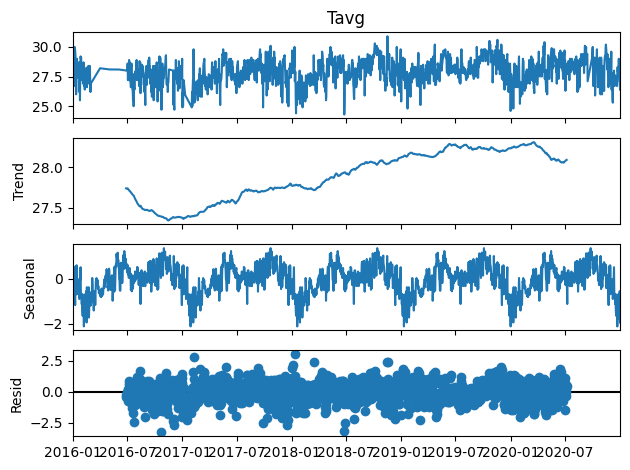

In [226]:
dec = sm.tsa.seasonal_decompose(stasiun_1_intrp['Tavg'] ,period = 356,model = 'additive').plot()
plt.show()

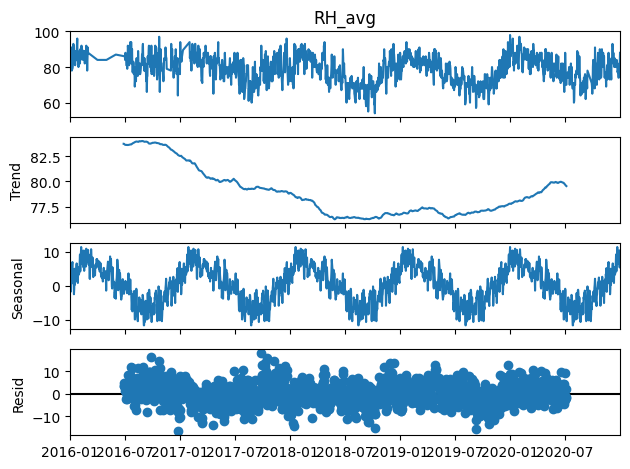

In [227]:
dec = sm.tsa.seasonal_decompose(stasiun_1_intrp['RH_avg'] ,period = 356,model = 'additive').plot()
plt.show()

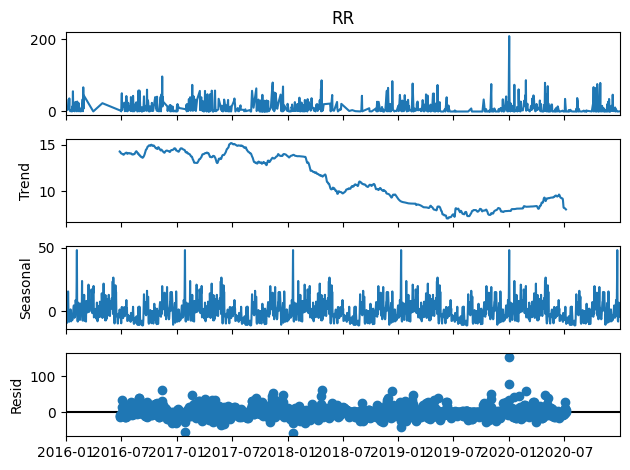

In [228]:
dec = sm.tsa.seasonal_decompose(stasiun_1_intrp['RR'],model = 'additive', period=356).plot()
plt.show()

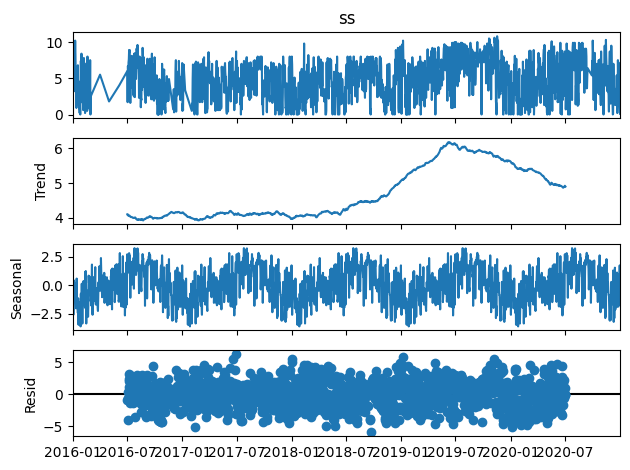

In [229]:
dec = sm.tsa.seasonal_decompose(stasiun_1_intrp['ss'] ,period = 365,model = 'additive').plot()


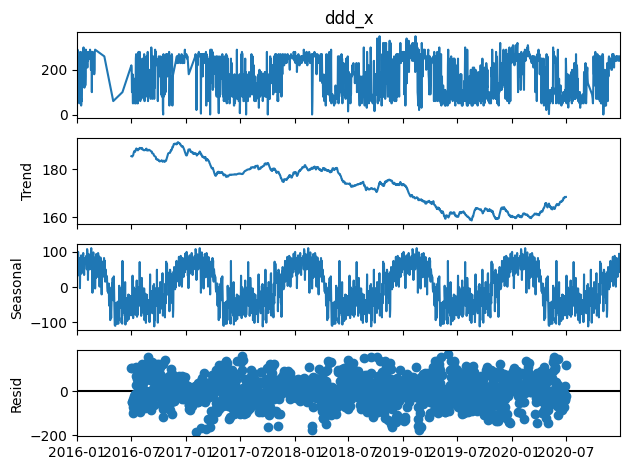

In [230]:
dec = sm.tsa.seasonal_decompose(stasiun_1_intrp['ddd_x'] ,period = 365,model = 'additive').plot()
plt.show()

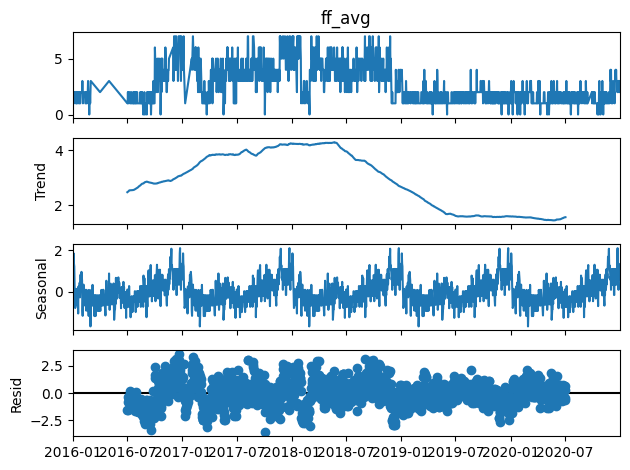

In [231]:
dec = sm.tsa.seasonal_decompose(stasiun_1_intrp['ff_avg'] ,period = 365,model = 'additive').plot()
plt.show()

In [232]:
stationarity_tester(stasiun_1_intrp['Tavg'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


Test Statistic   p-value Critical Value (1%) Critical Value (5%)  \
ADF       -4.733206  0.000073           -3.433976           -2.863142   
KPSS       1.255552      0.01               0.739               0.463   

     Critical Value (10%) reject_null  
ADF             -2.567623        True  
KPSS                0.347        True

In [233]:
stationarity_tester(stasiun_1_intrp['RH_avg'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


Test Statistic   p-value Critical Value (1%) Critical Value (5%)  \
ADF       -3.204152  0.019746           -3.433976           -2.863142   
KPSS       1.151637      0.01               0.739               0.463   

     Critical Value (10%) reject_null  
ADF             -2.567623        True  
KPSS                0.347        True

In [234]:
stationarity_tester(stasiun_1_intrp['RR'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


Test Statistic p-value Critical Value (1%) Critical Value (5%)  \
ADF        -7.51162     0.0            -3.43397           -2.863139   
KPSS        1.41704    0.01               0.739               0.463   

     Critical Value (10%) reject_null  
ADF             -2.567621        True  
KPSS                0.347        True

In [235]:
stationarity_tester(stasiun_1_intrp['ddd_x'])

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


Test Statistic   p-value Critical Value (1%) Critical Value (5%)  \
ADF       -5.040642  0.000018           -3.433958           -2.863134   
KPSS       0.313249       0.1               0.739               0.463   

     Critical Value (10%) reject_null  
ADF             -2.567618        True  
KPSS                0.347       False

In [236]:
stationarity_tester(stasiun_1_intrp['ff_avg'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


Test Statistic   p-value Critical Value (1%) Critical Value (5%)  \
ADF         -4.1721  0.000734           -3.433954           -2.863132   
KPSS       1.998164      0.01               0.739               0.463   

     Critical Value (10%) reject_null  
ADF             -2.567618        True  
KPSS                0.347        True

In [237]:
stationarity_tester(stasiun_1_intrp['ss'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


Test Statistic   p-value Critical Value (1%) Critical Value (5%)  \
ADF       -3.993921  0.001443           -3.433982           -2.863144   
KPSS       1.571947      0.01               0.739               0.463   

     Critical Value (10%) reject_null  
ADF             -2.567624        True  
KPSS                0.347        True

Kita bisa melihat meski kebanyak test ADF data sudah dikatakan stasioner namun untuk uji KPSS data belum bisa dikatakan stasioner

Maka dari itu kita akan melakukan differencing pada setiap fitur

### Orde Differencing 

Fungsi untuk differencing

In [238]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

Menerapkan orde differencing pada kolom Tavg untuk menghilangkan trend

In [239]:
diff_data_T = stasiun_1_intrp['Tavg'].diff()
diff_data_T.dropna(inplace=True)

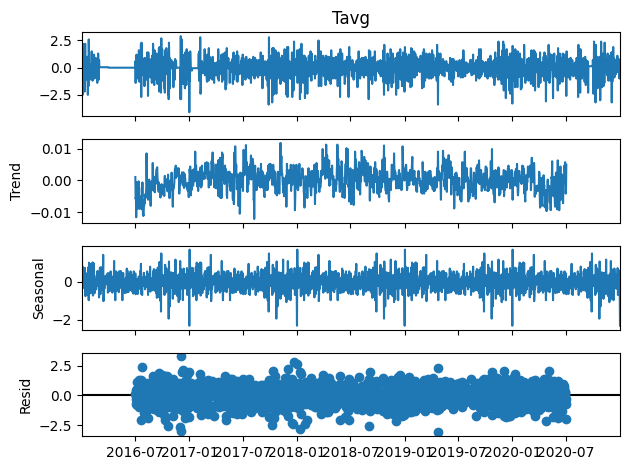

In [240]:
dec = sm.tsa.seasonal_decompose(diff_data_T ,period = 365,model = 'additive').plot()
plt.show()

In [241]:
stationarity_tester(diff_data_T)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


Test Statistic p-value Critical Value (1%) Critical Value (5%)  \
ADF      -14.860333     0.0           -3.433978           -2.863143   
KPSS       0.217662     0.1               0.739               0.463   

     Critical Value (10%) reject_null  
ADF             -2.567623        True  
KPSS                0.347       False

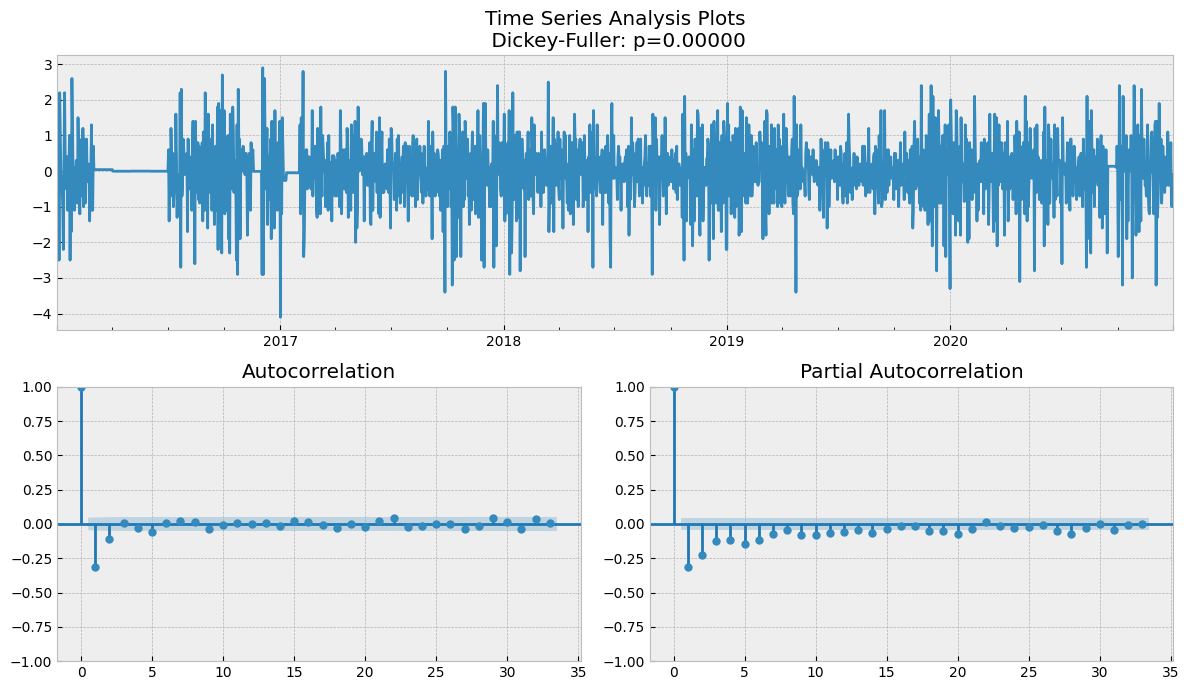

In [242]:
tsplot(diff_data_T)

parameter (p,d,q) Tavg = (1,1,1)

Menerapkan orde differencing pada kolom ss untuk menghilangkan trend

In [243]:
diff_data_ss = stasiun_1_intrp['ss'].diff()
diff_data_ss.dropna(inplace=True)

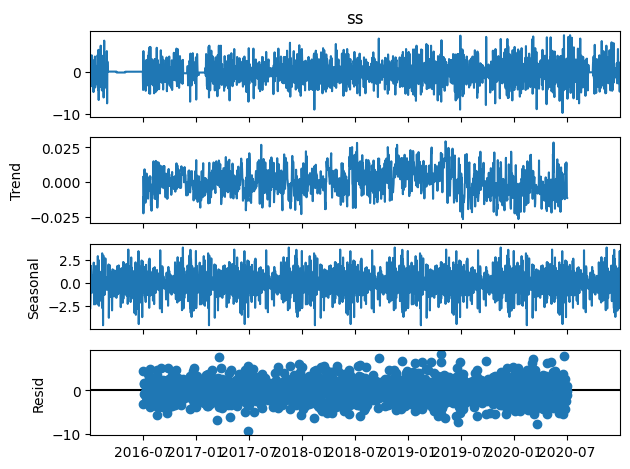

In [244]:
dec = sm.tsa.seasonal_decompose(diff_data_ss ,period = 365,model = 'additive').plot()
plt.show()

In [245]:
stationarity_tester(diff_data_ss)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


Test Statistic p-value Critical Value (1%) Critical Value (5%)  \
ADF      -14.555826     0.0           -3.433988           -2.863147   
KPSS       0.074735     0.1               0.739               0.463   

     Critical Value (10%) reject_null  
ADF             -2.567626        True  
KPSS                0.347       False

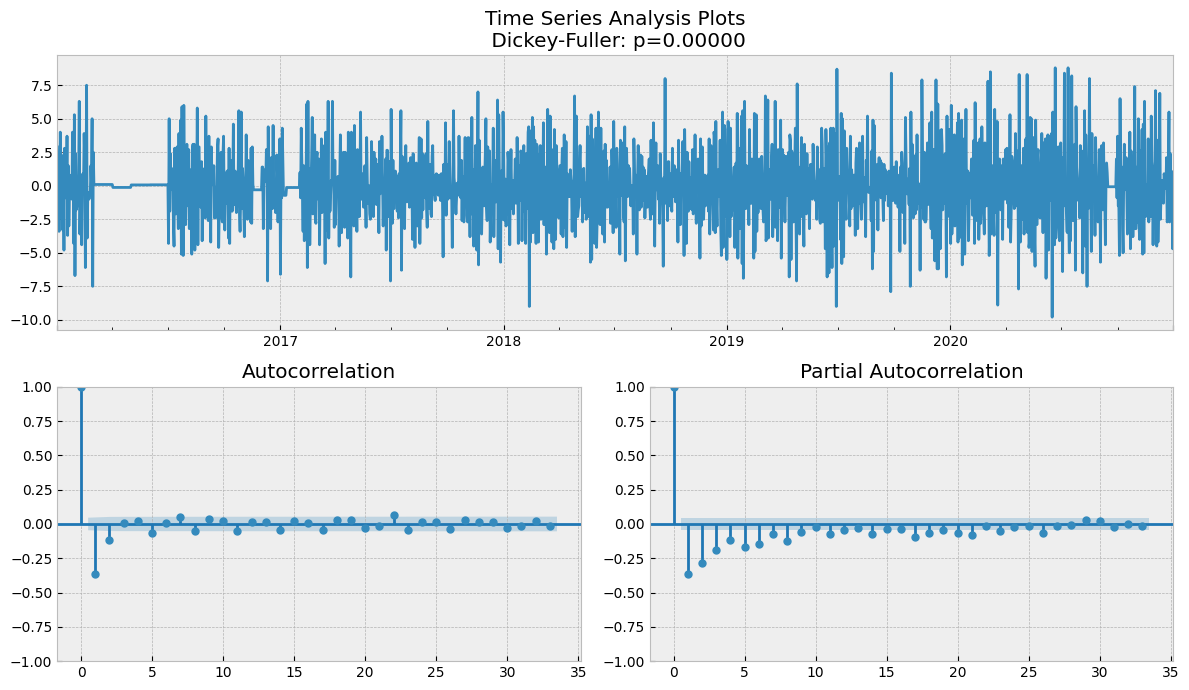

In [246]:
tsplot(diff_data_ss)

parameter (p,d,q) kolom ss = (2,1,1)

Menerapkan orde differencing pada kolom RH_avg untuk menghilangkan trend

In [247]:
diff_data_rh = stasiun_1_intrp['RH_avg'].diff()
diff_data_rh.dropna(inplace=True)

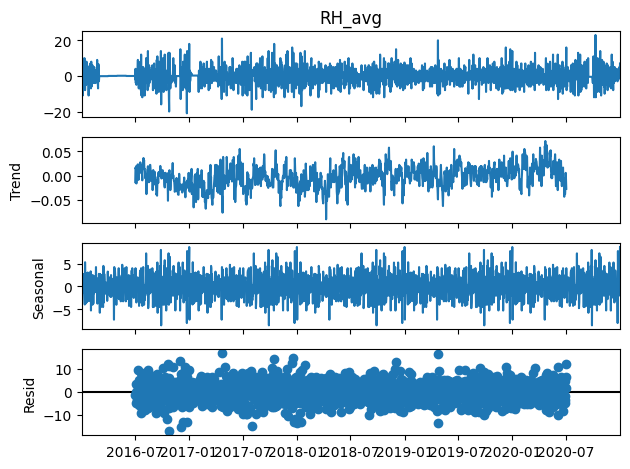

In [248]:
dec = sm.tsa.seasonal_decompose(diff_data_rh ,period = 365,model = 'additive').plot()
plt.show()

In [249]:
stationarity_tester(diff_data_rh)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


Test Statistic p-value Critical Value (1%) Critical Value (5%)  \
ADF      -15.499186     0.0           -3.433976           -2.863142   
KPSS       0.062119     0.1               0.739               0.463   

     Critical Value (10%) reject_null  
ADF             -2.567623        True  
KPSS                0.347       False

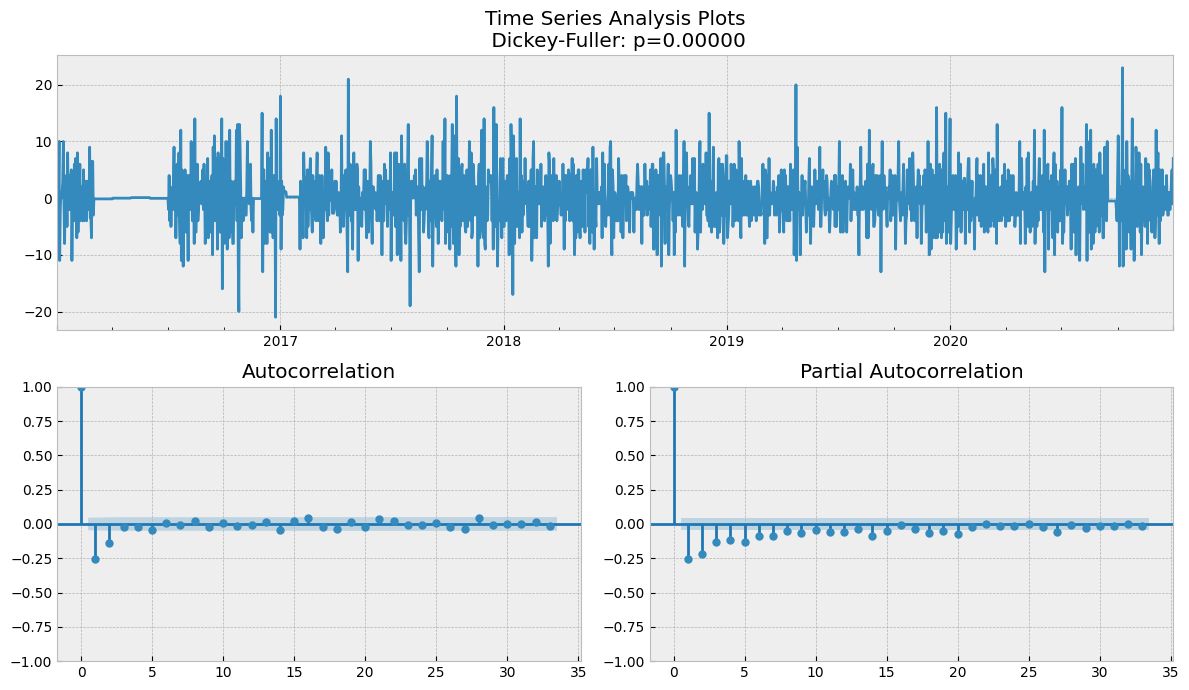

In [250]:
tsplot(diff_data_rh)

parameter (p,d,q) kolom rh = (1,1,1)

Menerapkan orde differencing pada kolom RR untuk menghilangkan trend

In [251]:
diff_data_rr = stasiun_1_intrp['RR'].diff(2)
diff_data_rr.dropna(inplace=True)

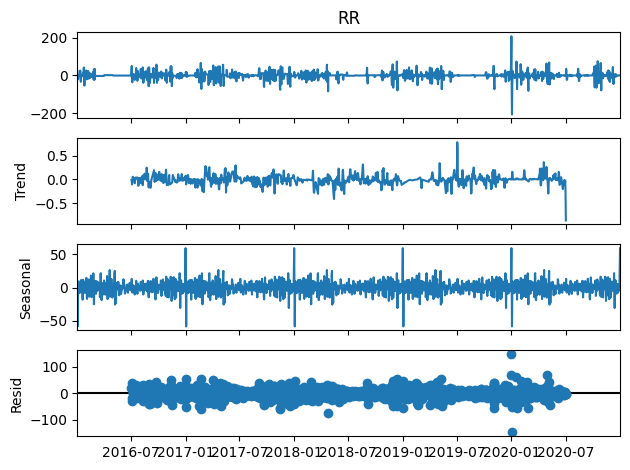

In [252]:
dec = sm.tsa.seasonal_decompose(diff_data_rr ,period = 365,model = 'additive').plot()
plt.show()

In [253]:
stationarity_tester(diff_data_rr)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


Test Statistic p-value Critical Value (1%) Critical Value (5%)  \
ADF      -12.560844     0.0            -3.43399           -2.863148   
KPSS       0.142289     0.1               0.739               0.463   

     Critical Value (10%) reject_null  
ADF             -2.567626        True  
KPSS                0.347       False

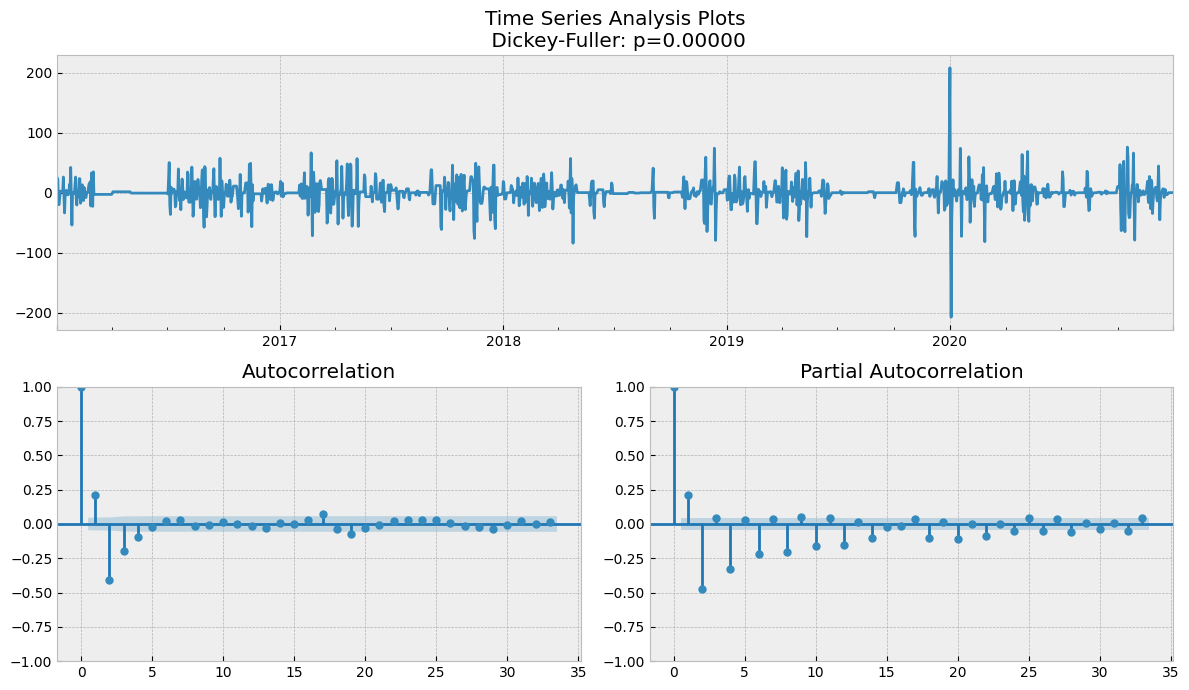

In [254]:
tsplot(diff_data_rr)

parameter (p,d,q) kolom RR = (2,(0,1,2),1)

Menerapkan orde differencing pada kolom ff_avg untuk menghilangkan trend

In [255]:
diff_data_ff = stasiun_1_intrp['ff_avg'].diff()
diff_data_ff.dropna(inplace=True)

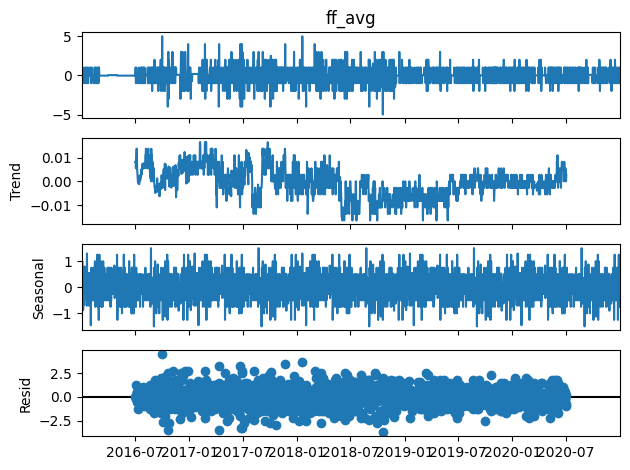

In [256]:
dec = sm.tsa.seasonal_decompose(diff_data_ff ,period = 365,model = 'additive').plot()
plt.show()

In [257]:
stationarity_tester(diff_data_ff)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


Test Statistic p-value Critical Value (1%) Critical Value (5%)  \
ADF      -16.534532     0.0           -3.433962           -2.863136   
KPSS       0.050671     0.1               0.739               0.463   

     Critical Value (10%) reject_null  
ADF             -2.567619        True  
KPSS                0.347       False

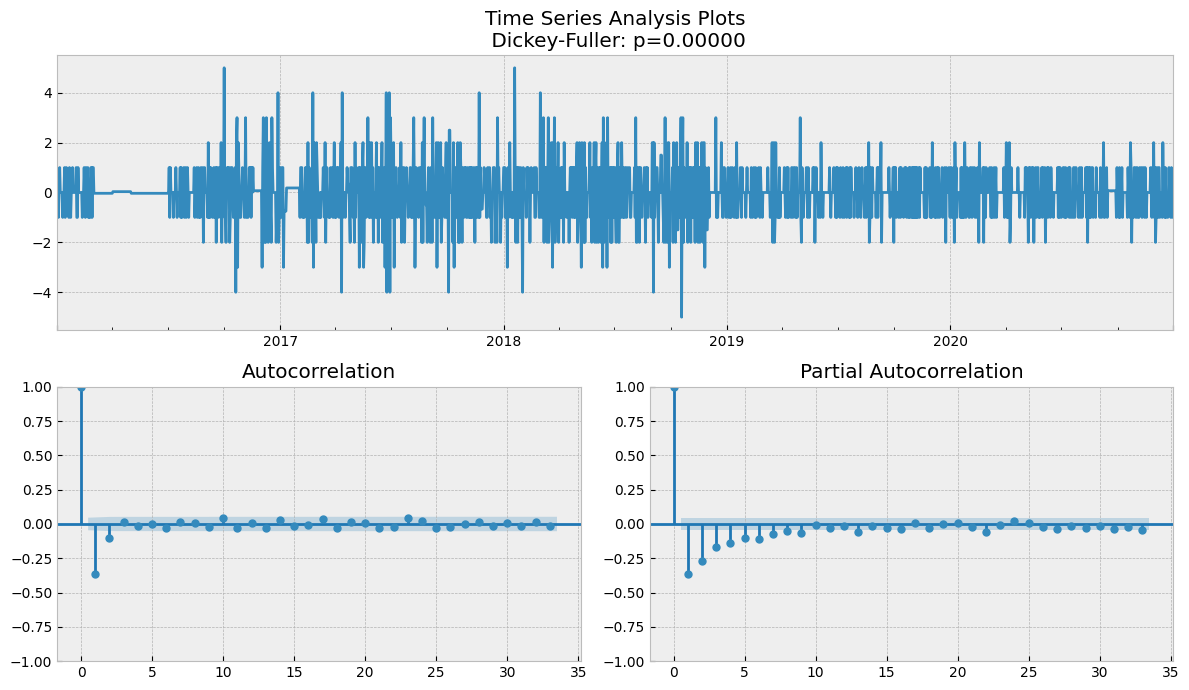

In [258]:
tsplot(diff_data_ff)

parameter (p,d,q) kolom ff = (2,(0,1),1)

Menerapkan orde differencing pada kolom ddd_x untuk menghilangkan trend

In [259]:
diff_data_ddd = stasiun_1_intrp['ddd_x'].diff()
diff_data_ddd.dropna(inplace=True)

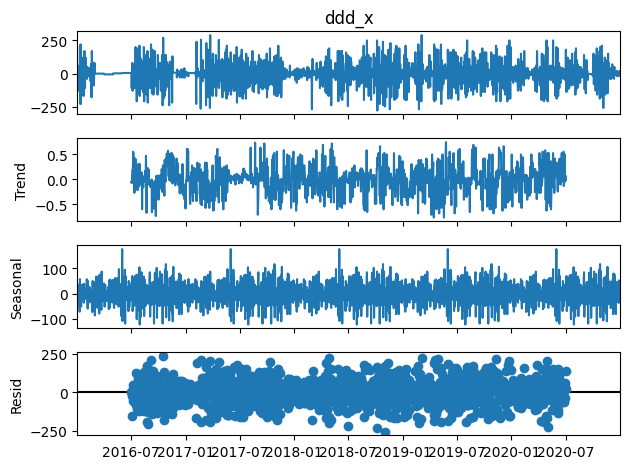

In [314]:
dec = sm.tsa.seasonal_decompose(diff_data_ddd ,period = 365, model = 'additive').plot()
plt.show()

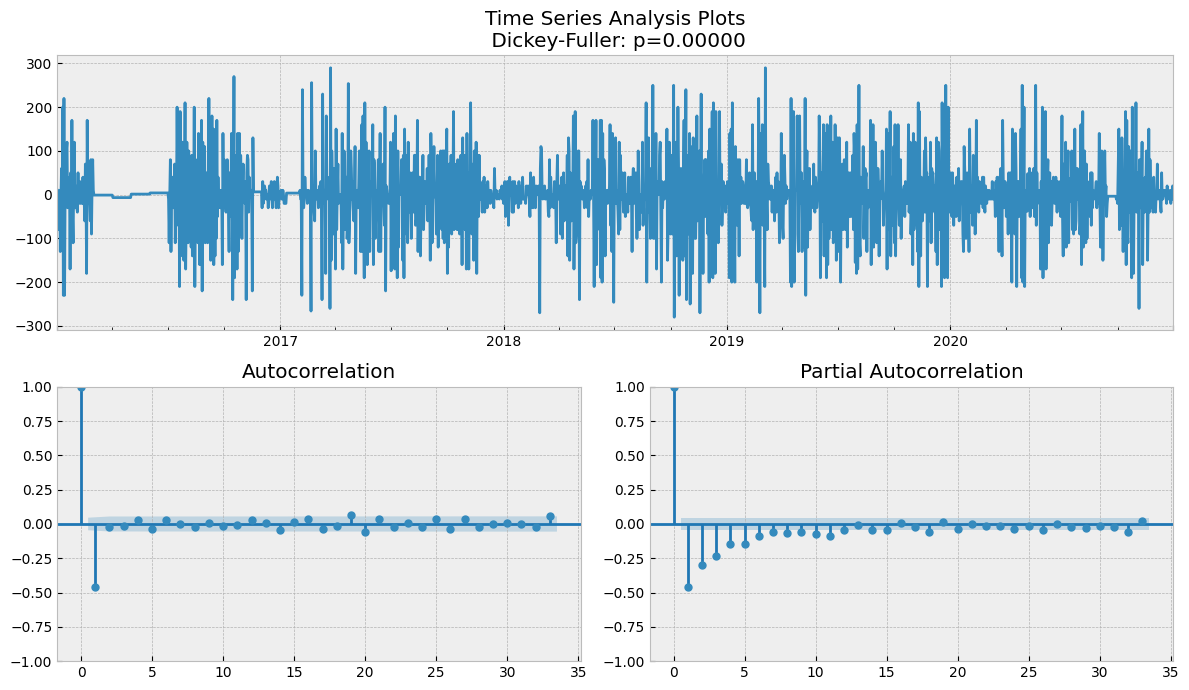

In [261]:
tsplot(diff_data_ddd)

parameter (p,d,q) kolom ddd = (2,1,1)

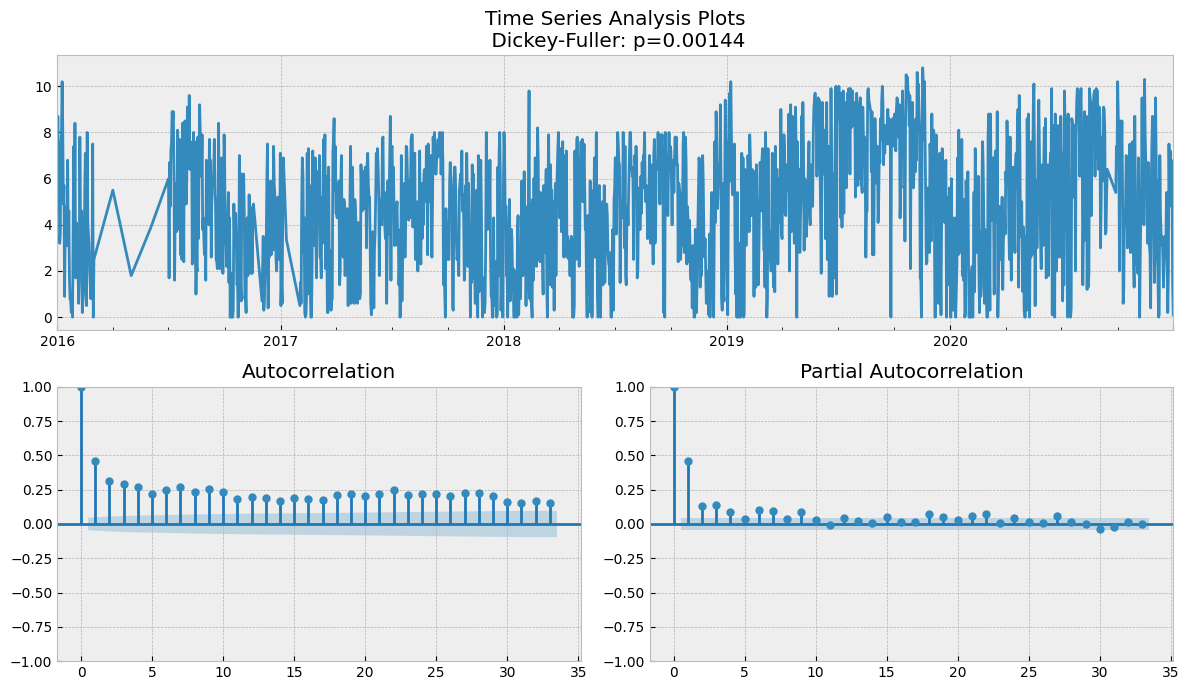

In [262]:
tsplot(stasiun_1_intrp['ss'])

parameter (p,d,q) kolom ddd = (2,0,1)

Apa itu parameter p,d,q ?
- p adalah orde autoregresif, yang mengindikasikan jumlah lag yang akan dimasukkan ke dalam model untuk memprediksi nilai berikutnya.
- d adalah derajat diferensiasi, yang menunjukkan berapa kali deret waktu telah diferensiasi agar menjadi stasioner.
- q adalah derajat diferensiasi, yang menunjukkan berapa kali deret waktu telah diferensiasi agar menjadi stasioner.


Dengan mengetahui parameter p,d,q, kita dapat memilih model ARIMA yang paling sesuai dengan deret waktu yang ingin diprediksi, sehingga meningkatkan akurasi dan ketepatan prediksi. 

## Modeling ARIMA

In [263]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
def train(column_name, p, d, q) :
    title = column_name + ' Forecast'
    train_data = stasiun_1_intrp[column_name][:len(stasiun_1_intrp)-365]
    test_data = stasiun_1_intrp[column_name][len(stasiun_1_intrp)-365:]
    
    model = ARIMA(train_data, order=(p, d, q))  
    model = model.fit()

    forecast = model.forecast(steps=365)

    # Hitung mean squared
    mae = mean_absolute_error(test_data, forecast)
    mse = mean_squared_error(test_data, forecast)
    print('Mean Absolute Error:', mae)

    fig = plt.figure(figsize=(10,4))
    plt.plot(train_data.index, train_data, label='Train')
    plt.plot(test_data.index, test_data, label='Test')
    plt.plot(forecast.index, forecast, label='Forecast')
    plt.title(title)
    plt.legend()
    plt.show()

Forecasting Rata-Rata Suhu(Tavg)

Mean Absolute Error: 0.8621139218429873


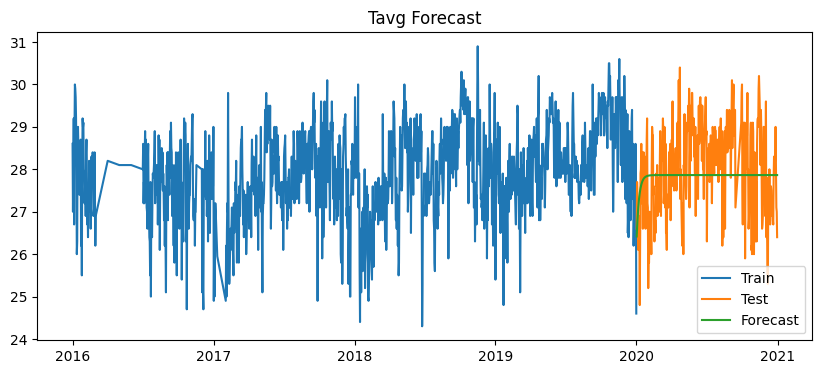

In [264]:
train('Tavg', 1, 0, 1)

Forecasting Kelembapan Rata-Rata(RH_avg)

Mean Absolute Error: 5.35171975119759


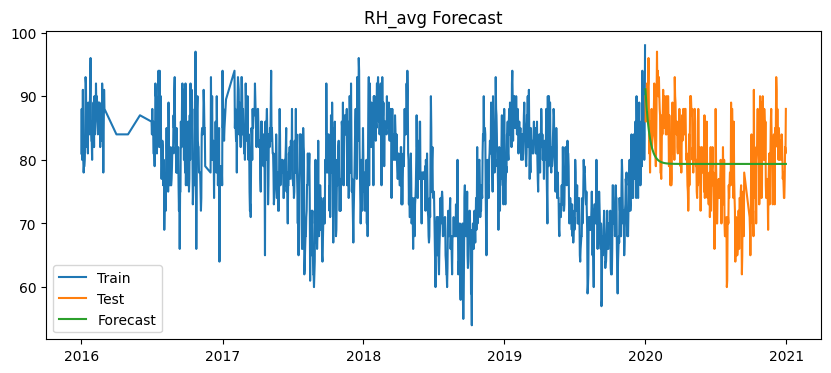

In [265]:
train('RH_avg', 1, 0, 1)

Forecasting Durasi Sinar Matahari (ss)

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Absolute Error: 2.4213028307250224


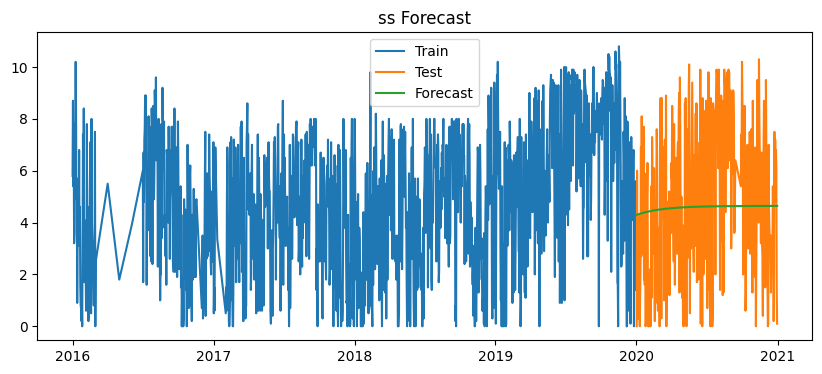

In [266]:
train('ss', 2, 0, 1)

Forecasting Curah Hujan (RR)

Mean Absolute Error: 12.838751953428968


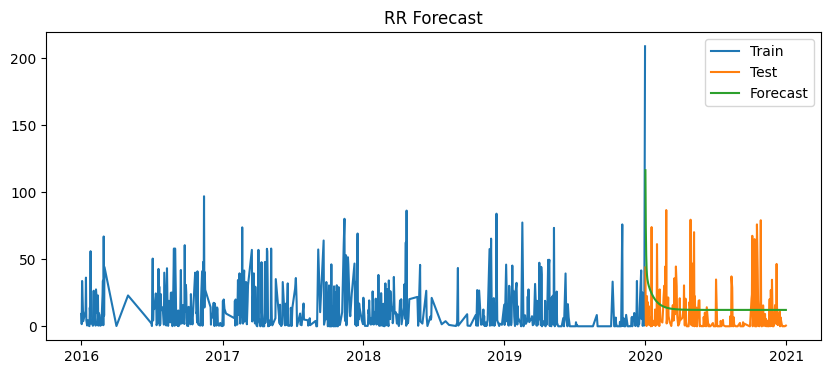

In [267]:
train('RR', 2,0,1)

Forecasting Rata-Rata Kecepatan Angin (ff_avg)

Mean Absolute Error: 0.6331166002700634


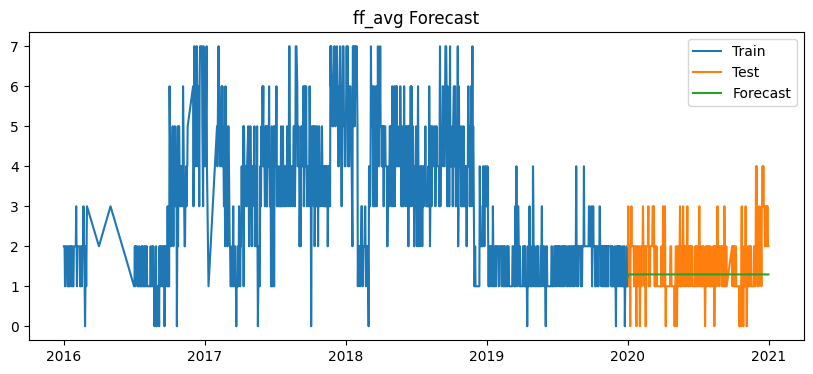

In [268]:
train('ff_avg', 2,1,1)

Forecasting ddd_x

Mean Absolute Error: 82.0614862227426


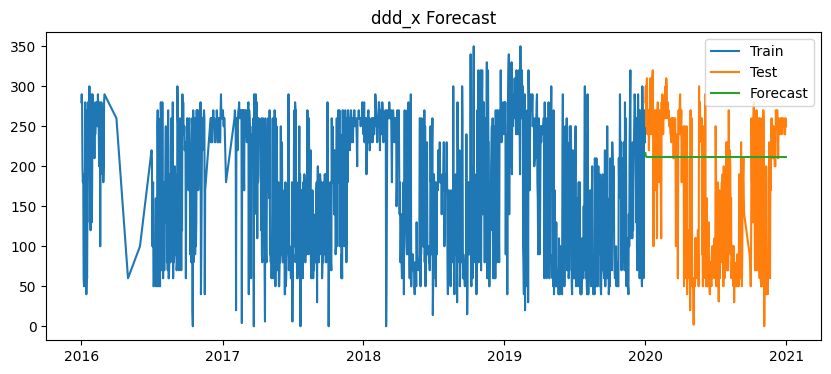

In [269]:
train('ddd_x', 2,1,1)

Karena nilai MAE yang begitu tinggi, maka kita mencoba mengubah skalanya dari derajat menjadi radiant

In [315]:
df_stasiun1_copy = stasiun_1_copy.copy()
df_stasiun1_copy['ddd_x'] = df_stasiun1_copy['ddd_x'].apply(lambda x: x * np.pi / 180)

Mean Absolute Error: 1.4322414319631518


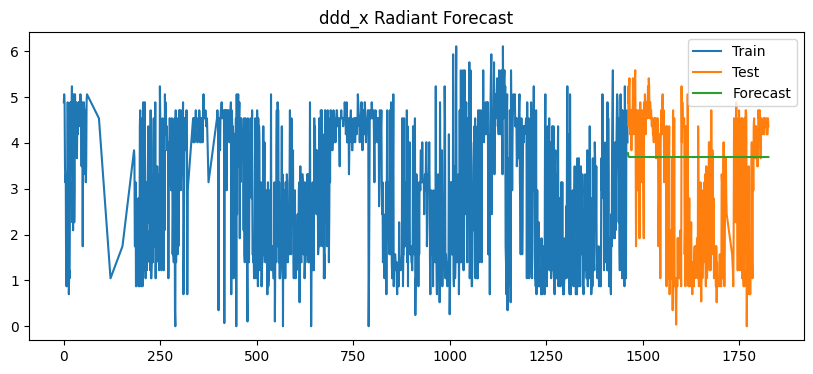

In [316]:
title = 'ddd_x Radiant Forecast'
train_data = df_stasiun1_copy['ddd_x'][:len(df_stasiun1_copy)-365]
test_data = df_stasiun1_copy['ddd_x'][len(df_stasiun1_copy)-365:]
    
model = ARIMA(train_data, order=(2,1,1))  
model = model.fit()

forecast = model.forecast(steps=365)

# Hitung mean squared
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
print('Mean Absolute Error:', mae)

fig = plt.figure(figsize=(10,4))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title(title)
plt.legend()
plt.show()

## Modeling SARIMA

In [272]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier 

In [273]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

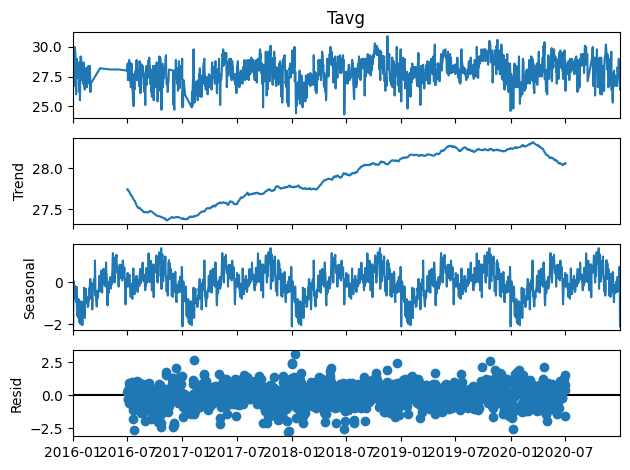

In [288]:
dec = sm.tsa.seasonal_decompose(stasiun_1_intrp['Tavg'] ,period = 365,model = 'additive').plot()
plt.show()

In [289]:
stationarity_tester(stasiun_1_intrp['Tavg'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


Test Statistic   p-value Critical Value (1%) Critical Value (5%)  \
ADF       -4.733206  0.000073           -3.433976           -2.863142   
KPSS       1.255552      0.01               0.739               0.463   

     Critical Value (10%) reject_null  
ADF             -2.567623        True  
KPSS                0.347        True

In [290]:
data_diff_T = stasiun_1_intrp['Tavg'].diff()
data_diff_T = data_diff_T.fillna(data_diff_T.median())

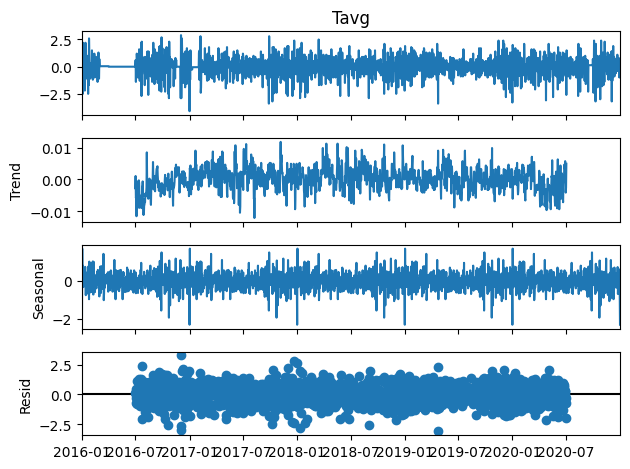

In [291]:
dec = sm.tsa.seasonal_decompose(data_diff_T ,period = 365,model = 'additive').plot()
plt.show()

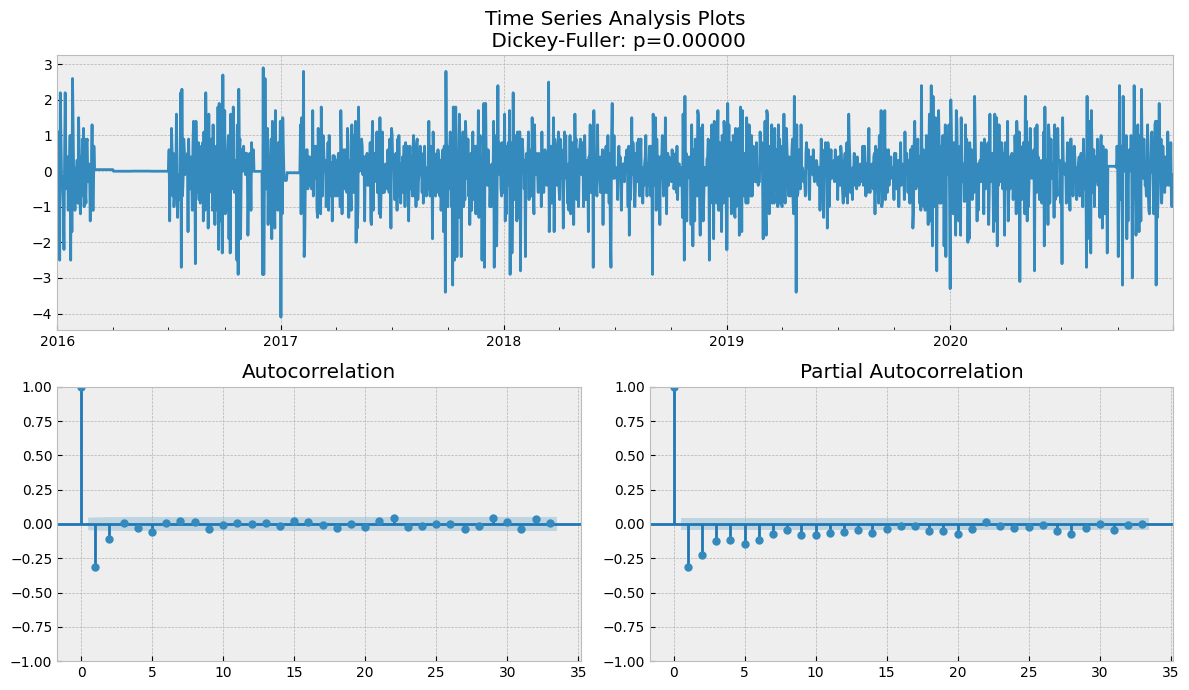

In [292]:
tsplot(data_diff_T)

In [293]:
data_diff_seas_T = data_diff_T.diff(356)
data_diff_seas_T = data_diff_seas_T.fillna(data_diff_T.median())

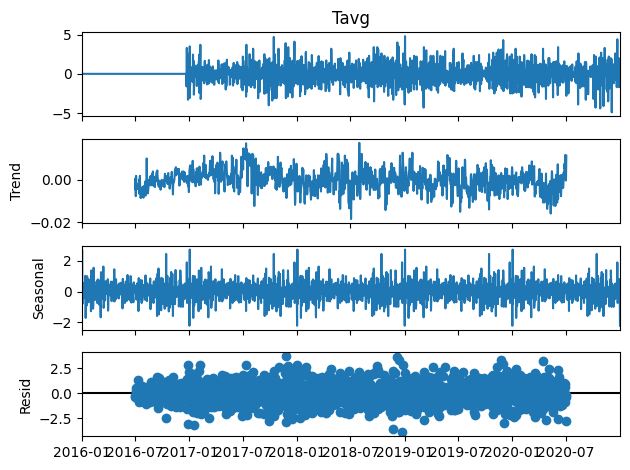

In [294]:
dec = sm.tsa.seasonal_decompose(data_diff_seas_T ,period = 365,model = 'additive').plot()
plt.show()

In [295]:
stationarity_tester(data_diff_seas_T)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


Test Statistic p-value Critical Value (1%) Critical Value (5%)  \
ADF      -13.364663     0.0           -3.433984           -2.863145   
KPSS       0.107043     0.1               0.739               0.463   

     Critical Value (10%) reject_null  
ADF             -2.567625        True  
KPSS                0.347       False

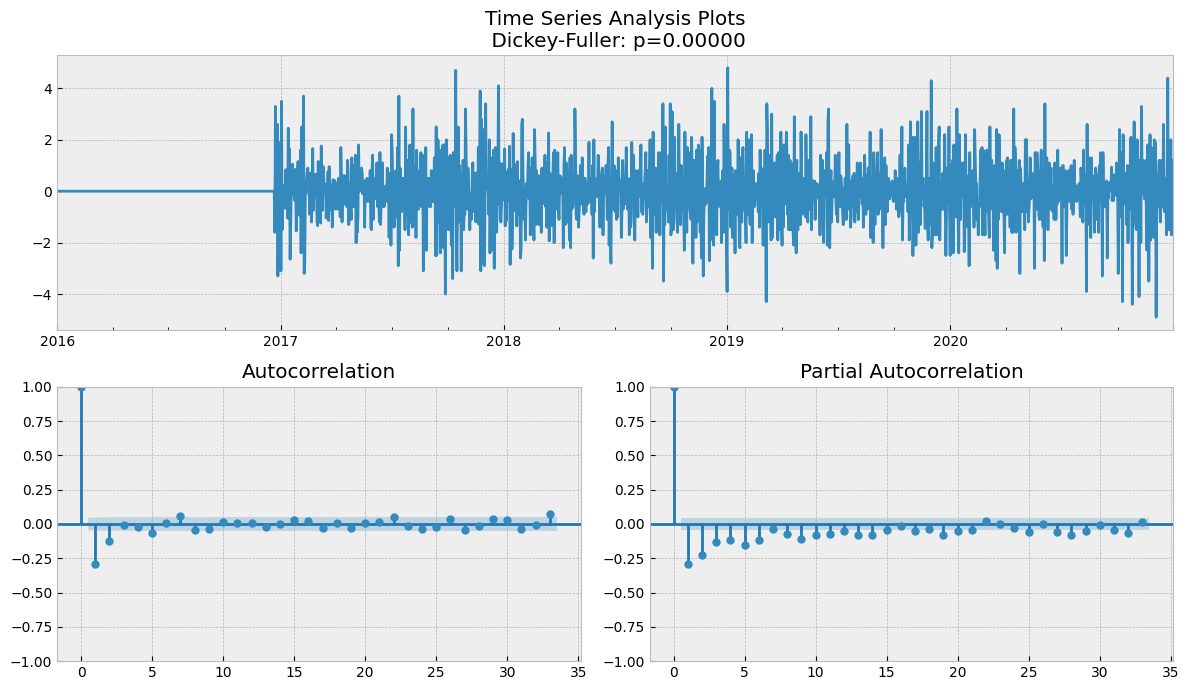

In [296]:
tsplot(data_diff_seas_T)

In [297]:
# karena jika indexnya perhari ternyata memakan waktu training yang sangat lama
# maka dari itu kami hanya menggunakan model ini hanya untuk sekedar mengetahui apakah hasilnya sama dengan arima?
stasiun1_weekly = stasiun_1_intrp.resample('W').mean()

In [298]:
train_data = stasiun1_weekly['Tavg'][:len(stasiun1_weekly)-52]
test_data = stasiun1_weekly['Tavg'][len(stasiun1_weekly)-52:]

model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 0, 2, 52))
model_fit = model.fit()

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Mean Absolute Error: 0.5693603827367046


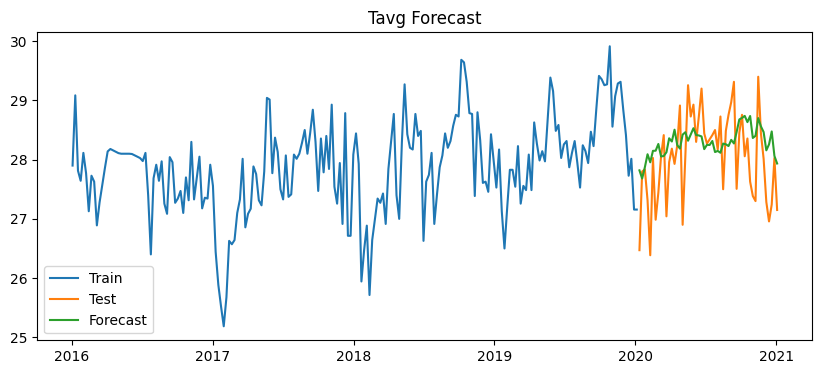

In [299]:
forecast = model_fit.forecast(steps = 52)

mae = mean_absolute_error(test_data, forecast)
print('Mean Absolute Error:', mae)

fig = plt.figure(figsize=(10,4))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Tavg Forecast')
plt.legend()
plt.show()

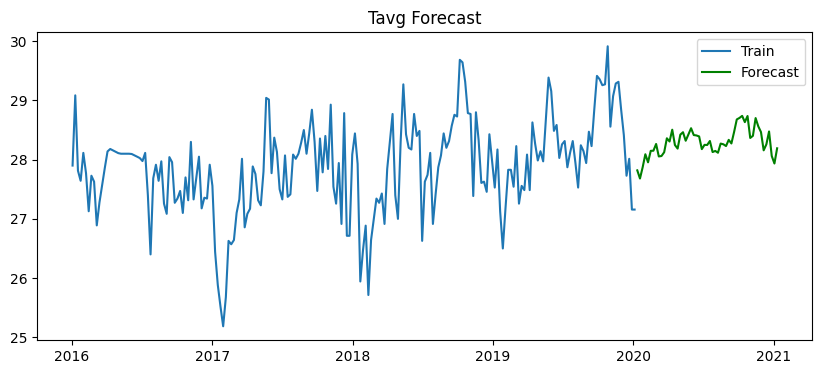

In [300]:
recast = model_fit.forecast(steps = 53)
fig = plt.figure(figsize=(10,4))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(recast.index, recast, label='Forecast', color='green')
plt.title('Tavg Forecast')
plt.legend()
plt.show()

## Modeling Prophet

Buat fungsi untuk mengganti nama column dan train mode prophet

In [305]:
stasiun_1_copy = stasiun_1_intrp.copy()

In [306]:
stasiun_1_copy['date'] = stasiun_1_copy.index
stasiun_1_copy.reset_index(drop=True, inplace=True)

In [311]:
stasiun_1_copy['date']

0      2016-01-01
1      2016-01-02
2      2016-01-03
3      2016-01-04
4      2016-01-05
          ...    
1822   2020-12-27
1823   2020-12-28
1824   2020-12-29
1825   2020-12-30
1826   2020-12-31
Name: date, Length: 1827, dtype: datetime64[ns]

In [308]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def get_model(data, column):
    df_train = data[['date', column]]
    df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
    
    my_model = Prophet()
    my_model.fit(df_train)
    
    return my_model

### Prophet with Default Parameters

Kita akan memprediksi setiap aspek-aspek hujan dengan model prophet

> Create Rainfall Prediction Model

In [317]:
model_RR = get_model(stasiun_1_copy, 'RR')

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_19860\3066456102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
04:20:04 - cmdstanpy - INFO - Chain [1] start processing
04:20:05 - cmdstanpy - INFO - Chain [1] done processing


In [318]:
#membuat prediksi 
future_dates = model_RR.make_future_dataframe(periods=365, freq='D')
future_dates.shape[0]

2192

In [319]:
forecast = model_RR.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds       yhat  yhat_lower  yhat_upper
0 2016-01-01  14.401064   -3.292795   33.545916
1 2016-01-02  15.050252   -3.405857   33.816891
2 2016-01-03  15.256439   -1.969337   32.907311
3 2016-01-04  14.882937   -3.324506   33.094926
4 2016-01-05  15.996321   -1.682071   35.899167

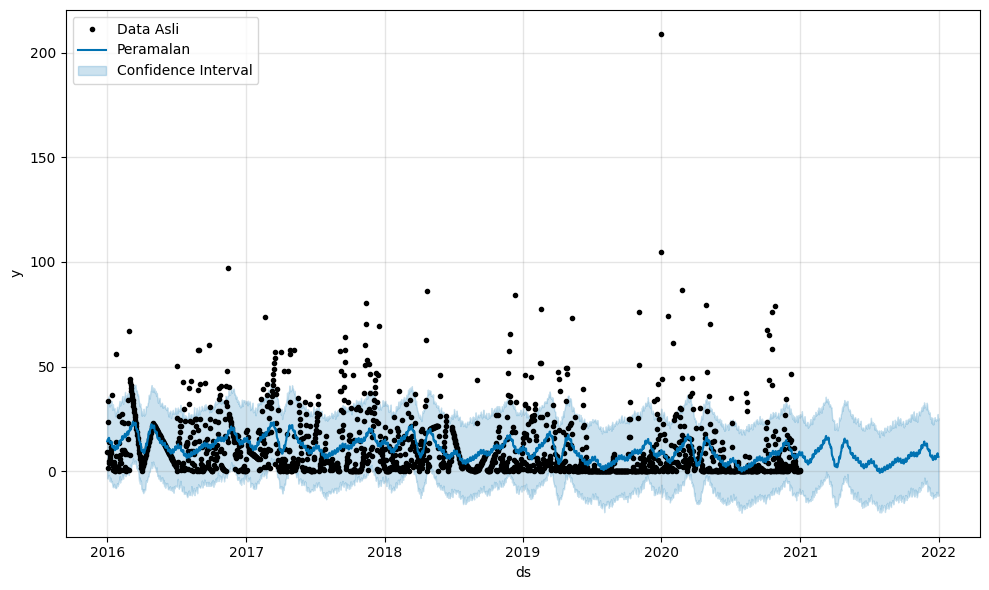

In [320]:
model_RR.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [321]:
def triple_metric(forecast, column):
    mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], stasiun_1_intrp[column][len(stasiun_1_intrp)-365:])
    print('Mean Absolute Error : ',mae)
    mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], stasiun_1_intrp[column][len(stasiun_1_intrp)-365:])
    print('Mean Squared Error : ',mse)
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun_1_intrp[column][len(stasiun_1_intrp)-365:])
    print('Mean Absolute Percentage Error : ',mape)

In [322]:
triple_metric(forecast, 'RR')

Mean Absolute Error :  8.661001495971574
Mean Squared Error :  201.7061570326363
Mean Absolute Percentage Error :  1.6363428986497512


In [323]:
predict_res_rr = forecast['yhat'][len(forecast)-720:-355]

>Create Sunshine Duration Prediction Model

In [324]:
model_ss = get_model(stasiun_1_copy, 'ss')

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_19860\3066456102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
04:20:06 - cmdstanpy - INFO - Chain [1] start processing
04:20:07 - cmdstanpy - INFO - Chain [1] done processing


In [325]:
future_dates = model_ss.make_future_dataframe(periods=365, freq='D')
forecast_ss = model_ss.predict(future_dates)

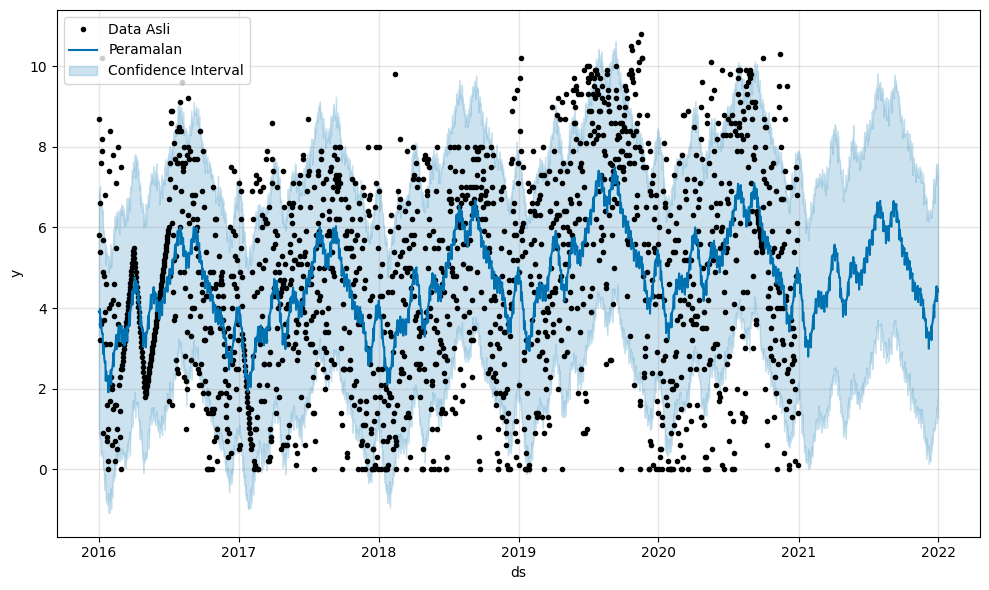

In [326]:
model_ss.plot(forecast_ss, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [327]:
triple_metric(forecast_ss, 'ss')

Mean Absolute Error :  2.2549037914931116
Mean Squared Error :  7.368915184306908
Mean Absolute Percentage Error :  0.44704501425388504


In [328]:
predict_res_ss = forecast_ss['yhat'][len(forecast)-720:-355]

> Create Average Wind Direction Predict Model

In [329]:
model_ddd = get_model(stasiun_1_copy, 'ddd_x')

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_19860\3066456102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
04:20:08 - cmdstanpy - INFO - Chain [1] start processing
04:20:08 - cmdstanpy - INFO - Chain [1] done processing


In [330]:
future_dates = model_ddd.make_future_dataframe(periods=365, freq='D')
forecast_ddd = model_ddd.predict(future_dates)

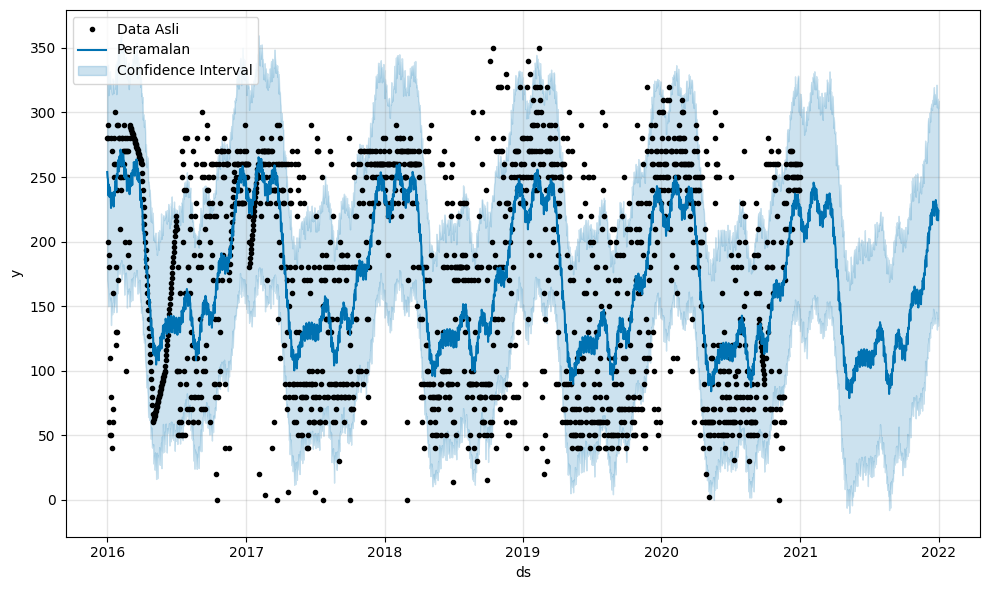

In [331]:
model_ddd.plot(forecast_ddd, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [332]:
triple_metric(forecast_ddd, 'ddd_x')

Mean Absolute Error :  53.03989987173905
Mean Squared Error :  4335.507075435033
Mean Absolute Percentage Error :  0.3701533454669047


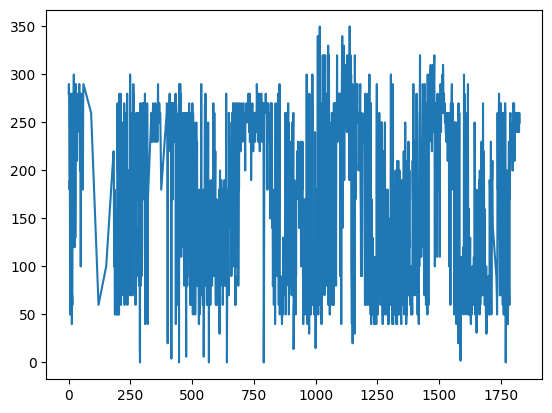

In [333]:
plt.plot(stasiun_1_copy['ddd_x'])

Disini kita akan mengubah satuannya dari derajat menjadi radiant pada ddd_x untuk melihat apakah nilai MAE-nya bisa menurun?

In [341]:
df_copy_dddx = stasiun_1_intrp.copy()
df_copy_dddx

Tn    Tx  Tavg  RH_avg         RR   ss  ff_x  ddd_x  ff_avg
2016-01-01  26.0  34.8  28.6    81.0   9.239964  5.8   5.0  280.0     2.0
2016-01-02  25.6  33.2  27.0    88.0   1.600000  8.7   4.0  290.0     2.0
2016-01-03  24.4  34.9  28.1    80.0  33.800000  5.4   4.0  280.0     2.0
2016-01-04  24.8  33.6  29.2    81.0  23.800000  6.6   3.0  200.0     1.0
2016-01-05  25.8  33.6  26.7    91.0  13.800000  3.2   3.0  180.0     1.0
...          ...   ...   ...     ...        ...  ...   ...    ...     ...
2020-12-27  24.8  33.7  29.0    74.0   0.000000  5.7   4.0  240.0     2.0
2020-12-28  25.4  32.8  28.1    77.0   0.050000  6.8   5.0  240.0     3.0
2020-12-29  24.8  30.8  27.1    82.0   0.100000  6.1   7.0  240.0     3.0
2020-12-30  24.6  30.8  27.0    81.0   0.300000  1.4   4.0  260.0     2.0
2020-12-31  24.4  29.8  26.4    88.0   0.500000  0.1   4.0  250.0     2.0

[1827 rows x 9 columns]

In [335]:
# Change the measure into radiant
df_copy_dddx['ddd_x'] = df_copy_dddx['ddd_x'].apply(lambda x: x * np.pi / 180)

Text(0.5, 1.0, 'ddd_x after convert into radiant')

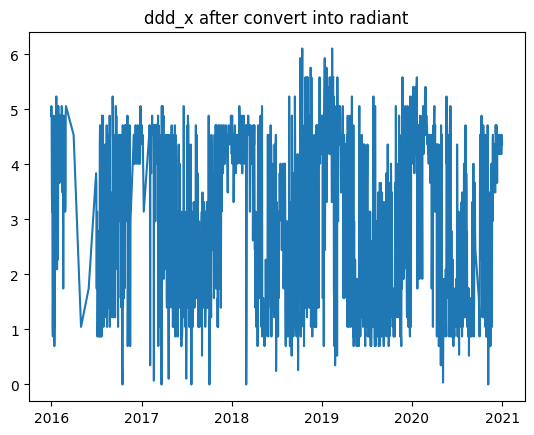

In [336]:
plt.plot(df_copy_dddx['ddd_x'])
plt.title('ddd_x after convert into radiant')

In [342]:
df_copy_dddx['date'] = df_copy_dddx.index
df_copy_dddx.reset_index(drop=True, inplace=True)

In [344]:
model_ddd_2 = get_model(df_copy_dddx, 'ddd_x')

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_19860\3066456102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
04:22:45 - cmdstanpy - INFO - Chain [1] start processing
04:22:45 - cmdstanpy - INFO - Chain [1] done processing


In [345]:
future_dates = model_ddd_2.make_future_dataframe(periods=365, freq='D')
forecast_ddd_2 = model_ddd_2.predict(future_dates)

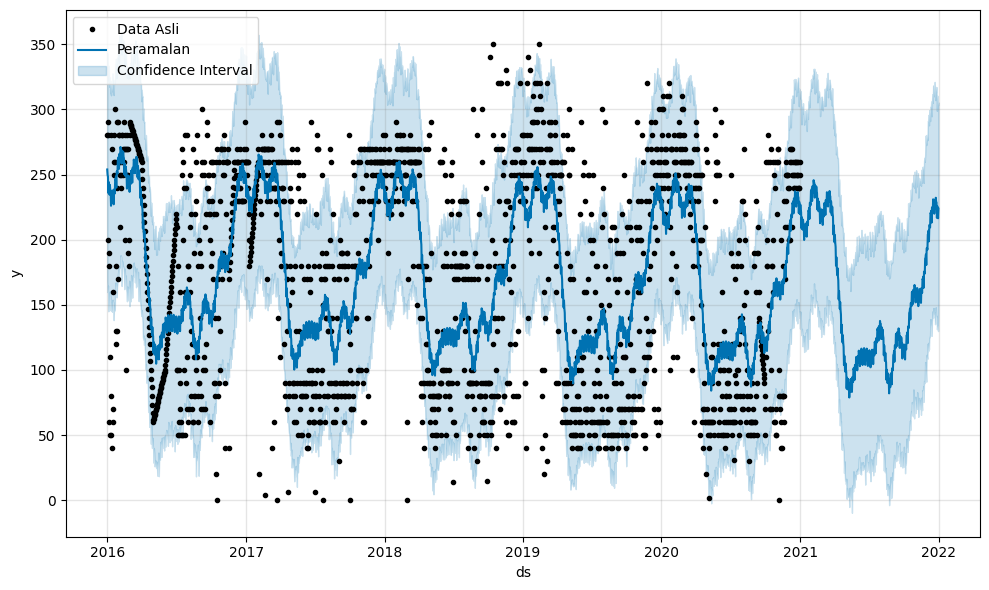

In [346]:
model_ddd_2.plot(forecast_ddd_2, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [347]:
mae = mean_absolute_error(forecast_ddd_2['yhat'][len(forecast_ddd_2)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Absolute Error : ',mae)
mse = mean_squared_error(forecast_ddd_2['yhat'][len(forecast_ddd_2)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Squared Error : ',mse)
mape = mean_absolute_percentage_error(forecast_ddd_2['yhat'][len(forecast_ddd_2)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Absolute Percentage Error : ',mape)

Mean Absolute Error :  99.30711930784842
Mean Squared Error :  13119.735907746028
Mean Absolute Percentage Error :  0.7730374452443002


Ternyata setelah dilakukan modulus pada ddd_x kita mendapatkan gambaran yang lebih jelas mengenai prediksi dan juga mengurangi erorrnya

In [348]:
predict_res_ddd = forecast_ddd_2['yhat'][len(forecast_ddd_2)-720:-355]

>Creating Wind Speed Average Prediction Model

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_19860\3066456102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
04:22:51 - cmdstanpy - INFO - Chain [1] start processing
04:22:51 - cmdstanpy - INFO - Chain [1] done processing


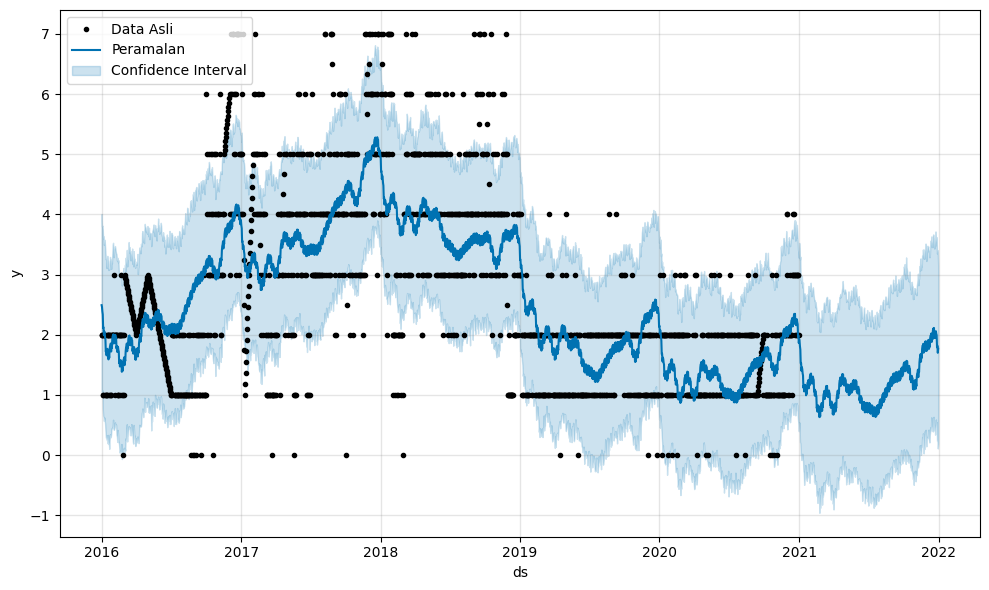

In [349]:
model_ff = get_model(stasiun_1_copy, 'ff_avg')
future_dates = model_ff.make_future_dataframe(periods=365, freq='D')
forecast_ff = model_ff.predict(future_dates)

model_ff.plot(forecast_ff, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [350]:
triple_metric(forecast_ff, 'ff_avg')

Mean Absolute Error :  0.6132488735142966
Mean Squared Error :  0.5826244403399307
Mean Absolute Percentage Error :  0.448051851109495


In [351]:
predict_res_ff = forecast_ff['yhat'][len(forecast_ff)-720:-355]

>Create Average Temperature Prediction Model

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_19860\3066456102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
04:22:52 - cmdstanpy - INFO - Chain [1] start processing
04:22:53 - cmdstanpy - INFO - Chain [1] done processing


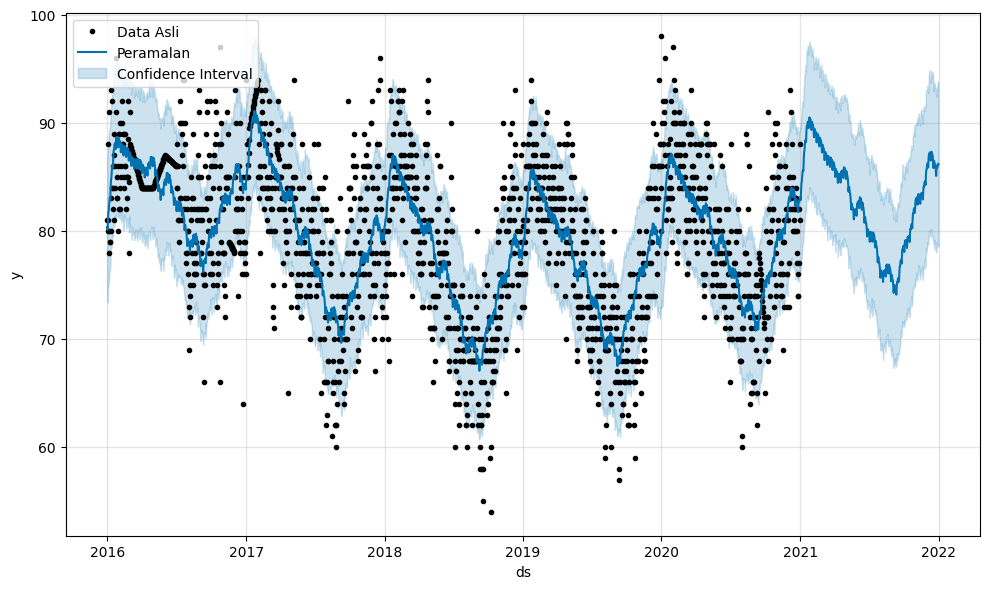

In [352]:
model_RH = get_model(stasiun_1_copy, 'RH_avg')
future_dates = model_RH.make_future_dataframe(periods=365, freq='D')
forecast_rh = model_RH.predict(future_dates)

model_RH.plot(forecast_rh, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [353]:
triple_metric(forecast_rh, 'RH_avg')

Mean Absolute Error :  4.139331565367911
Mean Squared Error :  26.82948315543325
Mean Absolute Percentage Error :  0.05218442377087091


In [354]:
predict_res_rh = forecast_rh['yhat'][len(forecast_rh)-720:-355]

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_19860\3066456102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
04:22:54 - cmdstanpy - INFO - Chain [1] start processing
04:22:54 - cmdstanpy - INFO - Chain [1] done processing


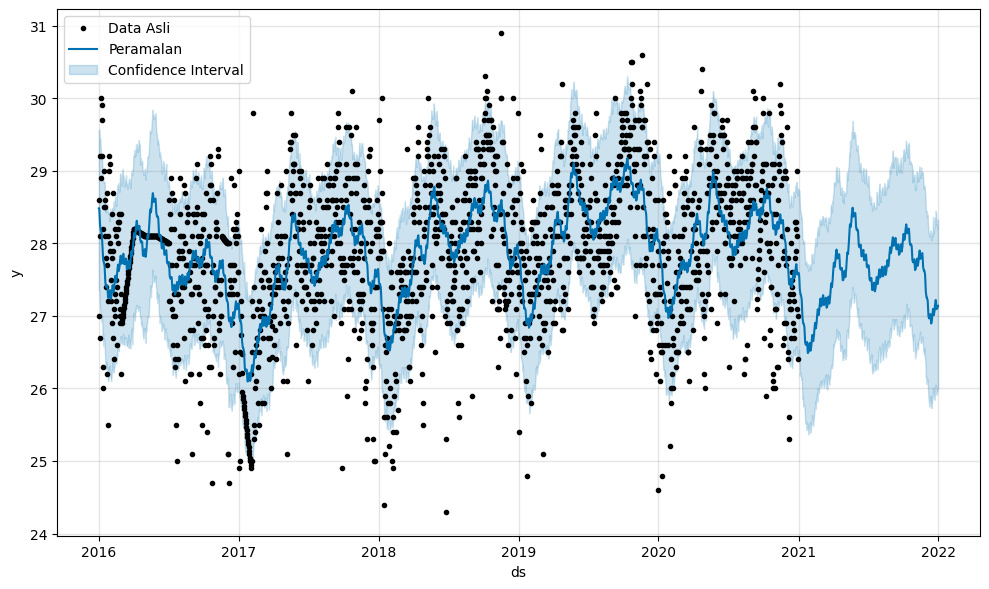

In [355]:
model_T = get_model(stasiun_1_copy, 'Tavg')
future_dates = model_T.make_future_dataframe(periods=365, freq='D')
forecast_t = model_T.predict(future_dates)

model_T.plot(forecast_t, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [356]:
triple_metric(forecast_t, 'Tavg')

Mean Absolute Error :  0.7682229047774515
Mean Squared Error :  0.9096786995275694
Mean Absolute Percentage Error :  0.027436698517795167


In [357]:
# Menyimpan prediksi ke variabel 
predict_res_t = forecast_t['yhat'][len(forecast_t)-720:-355]

Jadi kita menyimpan hasil prediksi ke masing-masing variabel yang telah ditentukan dan nantinya akan kita gabung dan kita klasifikasikan apakah kejadian itu banjir atau tidak dengan model klasifikasi yang telah kita latih sebelumnnya

### Test dengan model Klasifikasi (Tanpa Tuning Prophet)

Jadi kita juga ingin membandingkan nantinya dengan model Prophet yang akan kita Tuning

Kita buat semua menjadi dataframe

In [359]:
predict_res_rr = predict_res_rr.to_frame(name='RR')
predict_res_t = predict_res_t.to_frame(name='Tavg')
predict_res_rh = predict_res_rh.to_frame(name='RH_avg')
predict_res_ss = predict_res_ss.to_frame(name='ss')
predict_res_ff = predict_res_ff.to_frame(name='ff_avg')
predict_res_ddd = predict_res_ddd.to_frame(name='ddd_x')

Kemudian kita gabungkan semua dataframe menjadi satu data frame dan nanti kita mencoba model klasifikasi kita untuk mengidentifikasi suatu kejadian banjir

In [361]:
pred_res_2020 = pd.concat([predict_res_t, predict_res_rh, predict_res_ss, predict_res_ddd, predict_res_ff, predict_res_rr], axis=1)

In [362]:
pred_res_2020['region_name_Jakarta Selatan'] = 1
pred_res_2020['region_name_Jakarta Timur'] = 0
pred_res_2020['region_name_Jakarta Utara'] = 0

Kita ubah juga fitur ddd_x dengan modulus

In [363]:
def convert_radian_to_degree(radian):
    return radian * (180 / np.pi)

pred_res_2020['ddd_x'] = pred_res_2020['ddd_x'].apply(convert_radian_to_degree)

In [364]:
flood_predict = rf_tuning3.predict(pred_res_2020)

In [365]:
flood_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [366]:
sum = np.sum(flood_predict == 1)
sum

8

### HyperParameter Tuning Prophet for RR feature

<b>Kenapa fitur RR ?<b>

Jika dilihat dari grafik sebelumnya, ternyata banyak data aktual yang jaraknya jauh dari hasil prediksi fitur RR jika dibandingkan dengan yang lain. Oleh karena itu kita akan melakukan hyperparameter tuning menggunakan paramgrid agar tidak mencobanya satu-persatu secara manual

<b>Bagaimana cara mencari parameter yang optimal ?<b>

Jadi disini kita akan menggunakan metode ParameterGrid yaitu metode untuk mencari setiap kombinasi parameter dengan mencoba satu per satu ke model kita untuk mencari kombinasi paling optimal melalui perulangan

Disini kita akan mempertimbangkan MAPE untuk mencari kombinasi parameter yang paling optimal

In [368]:
import random
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_percentage_error

params_grid = {
    'seasonality_mode': ('multiplicative', 'additive'),
    'changepoint_prior_scale': [0.1, 0.2, 0.3, 0.4, 0.5],
    'n_changepoints': [100, 150, 200]
}

grid = ParameterGrid(params_grid)

best_mape = float('inf')  # Inisialisasi nilai MAPE terbaik dengan nilai tak terhingga

for p in grid:
    print(p)
    random.seed(0)
    train_model = Prophet(
        changepoint_prior_scale=p['changepoint_prior_scale'],
        n_changepoints=p['n_changepoints'],
        seasonality_mode=p['seasonality_mode'],
        weekly_seasonality=True,
        daily_seasonality=True,
        yearly_seasonality=True,
        interval_width=0.95
    )
    
    future = stasiun_1_copy[['date', 'RR']].copy()
    future.columns = ['ds', 'y']
    train_model.fit(future)
    
    future_forecast = train_model.make_future_dataframe(periods=365)
    forecast = train_model.predict(future_forecast)
    
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun_1_intrp['RR'][len(stasiun_1_intrp)-365:])
    
    if mape < best_mape:
        best_mape = mape
        best_parameters = p

print("Best Parameters:", best_parameters)
print("Best MAPE:", best_mape)

{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


04:24:01 - cmdstanpy - INFO - Chain [1] start processing
04:24:01 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


04:24:02 - cmdstanpy - INFO - Chain [1] start processing
04:24:02 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


04:24:03 - cmdstanpy - INFO - Chain [1] start processing
04:24:03 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


04:24:04 - cmdstanpy - INFO - Chain [1] start processing
04:24:04 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


04:24:05 - cmdstanpy - INFO - Chain [1] start processing
04:24:06 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


04:24:06 - cmdstanpy - INFO - Chain [1] start processing
04:24:07 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


04:24:07 - cmdstanpy - INFO - Chain [1] start processing
04:24:13 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


04:24:13 - cmdstanpy - INFO - Chain [1] start processing
04:24:14 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


04:24:14 - cmdstanpy - INFO - Chain [1] start processing
04:24:21 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


04:24:21 - cmdstanpy - INFO - Chain [1] start processing
04:24:22 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


04:24:22 - cmdstanpy - INFO - Chain [1] start processing
04:24:30 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


04:24:31 - cmdstanpy - INFO - Chain [1] start processing
04:24:31 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


04:24:32 - cmdstanpy - INFO - Chain [1] start processing
04:24:38 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


04:24:38 - cmdstanpy - INFO - Chain [1] start processing
04:24:39 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


04:24:39 - cmdstanpy - INFO - Chain [1] start processing
04:24:46 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


04:24:47 - cmdstanpy - INFO - Chain [1] start processing
04:24:47 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


04:24:48 - cmdstanpy - INFO - Chain [1] start processing
04:24:53 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


04:24:53 - cmdstanpy - INFO - Chain [1] start processing
04:24:54 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


04:24:55 - cmdstanpy - INFO - Chain [1] start processing
04:24:57 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


04:24:57 - cmdstanpy - INFO - Chain [1] start processing
04:24:58 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


04:24:59 - cmdstanpy - INFO - Chain [1] start processing
04:25:04 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


04:25:04 - cmdstanpy - INFO - Chain [1] start processing
04:25:05 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


04:25:06 - cmdstanpy - INFO - Chain [1] start processing
04:25:11 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


04:25:12 - cmdstanpy - INFO - Chain [1] start processing
04:25:13 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


04:25:14 - cmdstanpy - INFO - Chain [1] start processing
04:25:18 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


04:25:19 - cmdstanpy - INFO - Chain [1] start processing
04:25:20 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


04:25:21 - cmdstanpy - INFO - Chain [1] start processing
04:25:27 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


04:25:28 - cmdstanpy - INFO - Chain [1] start processing
04:25:30 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


04:25:30 - cmdstanpy - INFO - Chain [1] start processing
04:25:38 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


04:25:38 - cmdstanpy - INFO - Chain [1] start processing
04:25:40 - cmdstanpy - INFO - Chain [1] done processing


Best Parameters: {'changepoint_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Best MAPE: 1.205939073976514


Disini kita mendapatkan parameter yang paling optimal setelah melakukan metode ParameterGrid

In [446]:
def get_model2(data, column):
    df_train = data[['date', column]].copy()
    df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
    
    my_model = Prophet(changepoint_prior_scale=0.2, 
                       n_changepoints=150, 
                       seasonality_mode='multiplicative'
                       )  
    my_model.fit(df_train)
    
    return my_model

In [447]:
model_RR2 =  get_model2(stasiun_1_copy, 'RR')

04:54:41 - cmdstanpy - INFO - Chain [1] start processing
04:54:42 - cmdstanpy - INFO - Chain [1] done processing


In [448]:
future_dates2 = model_RR2.make_future_dataframe(periods=365, freq='D')
future_dates2.shape[0]


2192

In [449]:
forecast2 = model_RR2.predict(future_dates2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds       yhat  yhat_lower  yhat_upper
0 2016-01-01  13.124376   -4.758153   31.559093
1 2016-01-02  13.144916   -3.235655   30.637105
2 2016-01-03  13.468678   -5.109261   32.417105
3 2016-01-04  13.326941   -2.762513   32.137707
4 2016-01-05  14.635721   -3.404403   32.552382

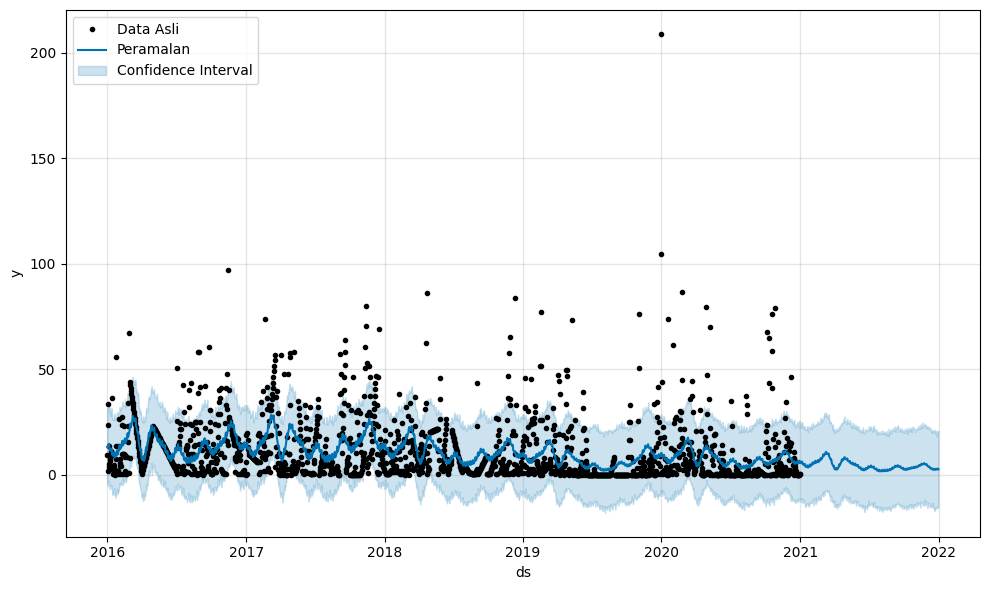

In [450]:
model_RR2.plot(forecast2, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [451]:
triple_metric(forecast2, 'RR')

Mean Absolute Error :  8.802967368682726
Mean Squared Error :  202.39084125768076
Mean Absolute Percentage Error :  1.2100527113595394


## Test dengan model Klasifikasi  (Hyperparameter Tuning Prophet)

In [452]:
predict_res_rr2 = forecast2['yhat'][len(forecast)-720:-355]
predict_res_rr2 = predict_res_rr2.to_frame(name='RR')
pred_res_2020_tuning2 = pd.concat([predict_res_t, predict_res_rh, predict_res_ss, predict_res_ddd, predict_res_ff, predict_res_rr2], axis=1)
pred_res_2020_tuning2['region_name_Jakarta Selatan'] = 1
pred_res_2020_tuning2['region_name_Jakarta Timur'] = 0
pred_res_2020_tuning2['region_name_Jakarta Utara'] = 0

In [466]:
pred_res_2020_tuning2

Tavg     RH_avg        ss       ddd_x    ff_avg        RR  \
1472  27.536845  83.781838  4.479302  215.550225  1.533865  7.268787   
1473  27.400135  84.468806  4.485918  204.414849  1.505403  7.022638   
1474  27.356071  84.638493  3.978527  214.443070  1.309600  7.790076   
1475  27.319270  85.148208  4.188434  212.247871  1.353759  7.774898   
1476  27.321419  85.434753  4.030241  208.711277  1.264153  5.920118   
...         ...        ...       ...         ...       ...       ...   
1832  27.293654  85.122261  4.601706  213.202542  1.532463  6.270729   
1833  27.290262  85.477416  4.455197  207.732249  1.399898  5.055081   
1834  27.258374  85.641686  4.328629  215.372790  1.460732  4.982019   
1835  27.228931  85.535891  4.224691  211.792440  1.430324  4.850886   
1836  27.120610  86.599835  4.187184  211.207767  1.360300  4.866320   

      region_name_Jakarta Selatan  region_name_Jakarta Timur  \
1472                            1                          0   
1473                            1                          0   
1474                            1                          0   
1475                            1                          0   
1476                            1                          0   
...                           ...                        ...   
1832                            1                          0   
1833                            1                          0   
1834                            1                          0   
1835                            1                          0   
1836                            1                          0   

      region_name_Jakarta Utara  
1472                          0  
1473                          0  
1474                          0  
1475                          0  
1476                          0  
...                         ...  
1832                          0  
1833                          0  
1834                          0  
1835                          0  
1836                          0  

[365 rows x 9 columns]

In [494]:
start_date = '2020-01-01'
end_date = '2020-12-30'
date_range = pd.date_range(start=start_date, end=end_date)
pred_res_2020_tuning2['date'] = date_range

Text(0.5, 1.0, 'Prediksi Curah Hujan 2020')

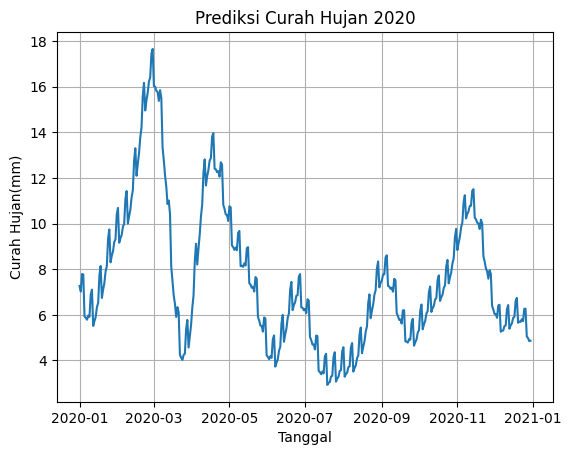

In [497]:
plt.plot(pred_res_2020_tuning2['date'], pred_res_2020_tuning2['RR'])
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan(mm)')
plt.grid(True)
plt.title('Prediksi Curah Hujan 2020')

Text(0.5, 1.0, 'Prediksi Temperatur 2020')

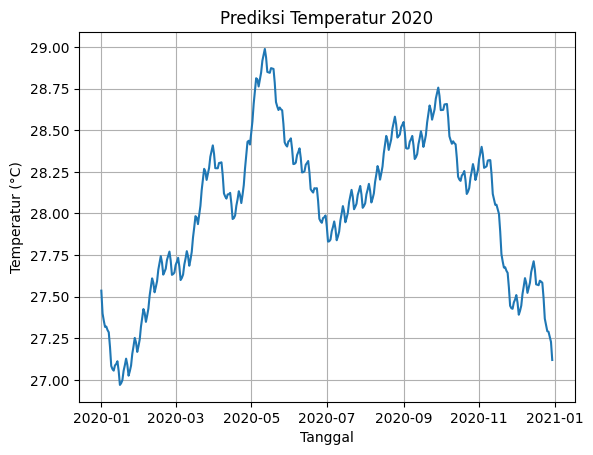

In [498]:
plt.plot(pred_res_2020_tuning2['date'], pred_res_2020_tuning2['Tavg'])
plt.xlabel('Tanggal')
plt.ylabel('Temperatur (°C)')
plt.grid(True)
plt.title('Prediksi Temperatur 2020')

Text(0.5, 1.0, 'Prediksi Kelembapan Udara 2020')

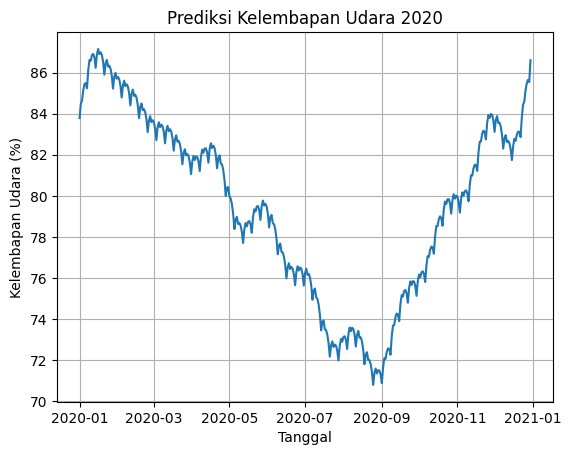

In [499]:
plt.plot(pred_res_2020_tuning2['date'], pred_res_2020_tuning2['RH_avg'])
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan Udara (%)')
plt.grid(True)
plt.title('Prediksi Kelembapan Udara 2020')

Text(0.5, 1.0, 'Prediksi Durasi Cahaya Matahari 2020')

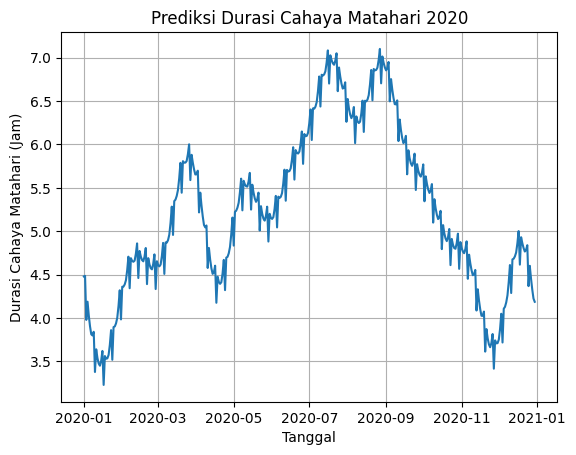

In [500]:
plt.plot(pred_res_2020_tuning2['date'], pred_res_2020_tuning2['ss'])
plt.xlabel('Tanggal')
plt.ylabel('Durasi Cahaya Matahari (Jam)')
plt.grid(True)
plt.title('Prediksi Durasi Cahaya Matahari 2020')

Text(0.5, 1.0, 'Prediksi Kecepatan Angin 2020')

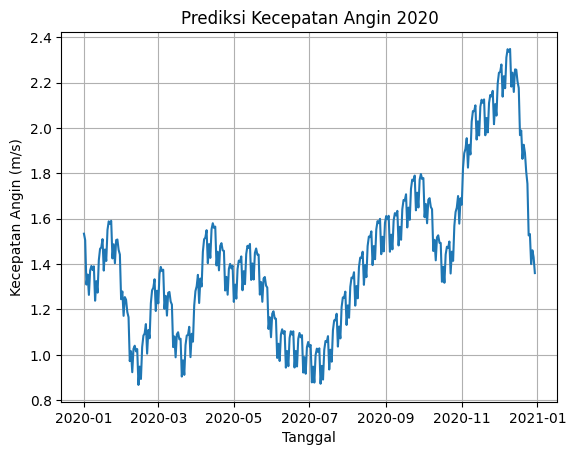

In [501]:
plt.plot(pred_res_2020_tuning2['date'], pred_res_2020_tuning2['ff_avg'])
plt.xlabel('Tanggal')
plt.ylabel('Kecepatan Angin (m/s)')
plt.grid(True)
plt.title('Prediksi Kecepatan Angin 2020')

Text(0.5, 1.0, 'Prediksi Arah Mata Angin 2020')

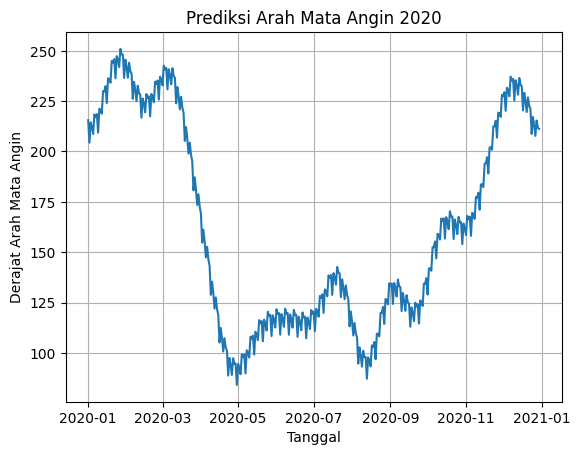

In [502]:
plt.plot(pred_res_2020_tuning2['date'], pred_res_2020_tuning2['ddd_x'])
plt.xlabel('Tanggal')
plt.ylabel('Derajat Arah Mata Angin')
plt.grid(True)
plt.title('Prediksi Arah Mata Angin 2020')

In [ ]:
plt.plot(pred_res_2020_tuning2['date'], pred_res_2020_tuning2[''])
plt.xlabel('Tanggal')
plt.ylabel('Durasi Cahaya Matahari (Jam)')
plt.grid(True)
plt.title('Prediksi Durasi Cahaya Matahari 2020')

In [453]:
flood_predict2 = rf_tuning3.predict(pred_res_2020_tuning2)
flood_predict2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [454]:
sum2 = np.sum(flood_predict2 == 1)
sum2

46

Jadi bisa kita lihat bahwa kejadian banjir meningkat, jadi benar bahwa dengan mengatur paramater dapat mengoptimalkan model yang memprediksi curah hujan

### Check metrics value with the actual label

In [455]:
df_cleaned

Tn    Tx  Tavg  RH_avg   ss  ff_x  ddd_x  ff_avg         RR  \
date                                                                        
2016-01-01  26.0  34.8  28.6    81.0  5.8   5.0  280.0     2.0   9.239964   
2016-01-02  25.6  33.2  27.0    88.0  8.7   4.0  290.0     2.0   1.600000   
2016-01-03  24.4  34.9  28.1    80.0  5.4   4.0  280.0     2.0  33.800000   
2016-01-04  24.8  33.6  29.2    81.0  6.6   3.0  200.0     1.0  23.800000   
2016-01-05  25.8  33.6  26.7    91.0  3.2   3.0  180.0     1.0  13.800000   
...          ...   ...   ...     ...  ...   ...    ...     ...        ...   
2018-12-27  23.8  32.0  28.0    70.0  0.2  12.0  180.0     5.0   2.300000   
2018-12-28  24.0  33.4  28.5    69.0  0.2  14.0  250.0     3.0   4.200000   
2018-12-29  25.2  33.4  28.7    70.0  0.2  14.0  120.0     5.0   6.100000   
2018-12-30  24.0  34.4  30.0    64.0  0.2  14.0  240.0     5.0   8.000000   
2018-12-31  25.4  32.8  28.2    69.0  0.2  14.0  180.0     5.0   9.900000   

           ddd_car      region_name  flood  
date                                        
2016-01-01      S   Jakarta Selatan      0  
2016-01-02      W   Jakarta Selatan      1  
2016-01-03      SW  Jakarta Selatan      1  
2016-01-04      S   Jakarta Selatan      0  
2016-01-05      S   Jakarta Selatan      0  
...            ...              ...    ...  
2018-12-27      W     Jakarta Timur      0  
2018-12-28      SE    Jakarta Timur      0  
2018-12-29      SW    Jakarta Timur      0  
2018-12-30      W     Jakarta Timur      0  
2018-12-31      SE    Jakarta Timur      0  

[6308 rows x 12 columns]

In [456]:
dates = pd.date_range('2020-01-01', periods=len(flood_predict2))
y_predict3 = pd.DataFrame(flood_predict2, index=dates)

In [457]:
y_test = df_cleaned[(df_cleaned['region_name']=='Jakarta Selatan')]
y_test = y_test[(y_test.index>'2020-01-01')&(y_test.index<'2020-12-31')]
y_test = y_test['flood']

In [458]:
print(len(y_test))
print(len(flood_predict2))

351
365


In [459]:
# menyamakan index dari data awal yang memiliki index tanggal tidak lengkap
unique_dates = y_test.index.unique()
y_pred_filtered = y_predict3[y_predict3.index.isin(unique_dates)]

In [461]:
accuracy = accuracy_score(y_test, y_pred_filtered)
print("Accuracy:", accuracy)

Accuracy: 0.7692307692307693


### Predict 2021

In [402]:
stasiun_1_actual = stasiun1.copy()

In [403]:
stasiun_1_actual

Tn    Tx  Tavg  RH_avg   ss  ff_x  ddd_x  ff_avg         RR  \
date                                                                        
2016-01-01  26.0  34.8  28.6    81.0  5.8   5.0  280.0     2.0   9.239964   
2016-01-02  25.6  33.2  27.0    88.0  8.7   4.0  290.0     2.0   1.600000   
2016-01-03  24.4  34.9  28.1    80.0  5.4   4.0  280.0     2.0  33.800000   
2016-01-04  24.8  33.6  29.2    81.0  6.6   3.0  200.0     1.0  23.800000   
2016-01-05  25.8  33.6  26.7    91.0  3.2   3.0  180.0     1.0  13.800000   
...          ...   ...   ...     ...  ...   ...    ...     ...        ...   
2020-12-27  24.8  33.7  29.0    74.0  5.7   4.0  240.0     2.0   0.000000   
2020-12-28  25.4  32.8  28.1    77.0  6.8   5.0  240.0     3.0   0.050000   
2020-12-29  24.8  30.8  27.1    82.0  6.1   7.0  240.0     3.0   0.100000   
2020-12-30  24.6  30.8  27.0    81.0  1.4   4.0  260.0     2.0   0.300000   
2020-12-31  24.4  29.8  26.4    88.0  0.1   4.0  250.0     2.0   0.500000   

           ddd_car      region_name  flood  
date                                        
2016-01-01      S   Jakarta Selatan      0  
2016-01-02      W   Jakarta Selatan      1  
2016-01-03      SW  Jakarta Selatan      1  
2016-01-04      S   Jakarta Selatan      0  
2016-01-05      S   Jakarta Selatan      0  
...            ...              ...    ...  
2020-12-27      SW  Jakarta Selatan      0  
2020-12-28      SW  Jakarta Selatan      0  
2020-12-29      SW  Jakarta Selatan      0  
2020-12-30      W   Jakarta Selatan      0  
2020-12-31      SW  Jakarta Selatan      0  

[1658 rows x 12 columns]

In [404]:
y_test = stasiun_1_actual[(stasiun_1_actual['region_name']=='Jakarta Selatan')]
y_test

Tn    Tx  Tavg  RH_avg   ss  ff_x  ddd_x  ff_avg         RR  \
date                                                                        
2016-01-01  26.0  34.8  28.6    81.0  5.8   5.0  280.0     2.0   9.239964   
2016-01-02  25.6  33.2  27.0    88.0  8.7   4.0  290.0     2.0   1.600000   
2016-01-03  24.4  34.9  28.1    80.0  5.4   4.0  280.0     2.0  33.800000   
2016-01-04  24.8  33.6  29.2    81.0  6.6   3.0  200.0     1.0  23.800000   
2016-01-05  25.8  33.6  26.7    91.0  3.2   3.0  180.0     1.0  13.800000   
...          ...   ...   ...     ...  ...   ...    ...     ...        ...   
2020-12-27  24.8  33.7  29.0    74.0  5.7   4.0  240.0     2.0   0.000000   
2020-12-28  25.4  32.8  28.1    77.0  6.8   5.0  240.0     3.0   0.050000   
2020-12-29  24.8  30.8  27.1    82.0  6.1   7.0  240.0     3.0   0.100000   
2020-12-30  24.6  30.8  27.0    81.0  1.4   4.0  260.0     2.0   0.300000   
2020-12-31  24.4  29.8  26.4    88.0  0.1   4.0  250.0     2.0   0.500000   

           ddd_car      region_name  flood  
date                                        
2016-01-01      S   Jakarta Selatan      0  
2016-01-02      W   Jakarta Selatan      1  
2016-01-03      SW  Jakarta Selatan      1  
2016-01-04      S   Jakarta Selatan      0  
2016-01-05      S   Jakarta Selatan      0  
...            ...              ...    ...  
2020-12-27      SW  Jakarta Selatan      0  
2020-12-28      SW  Jakarta Selatan      0  
2020-12-29      SW  Jakarta Selatan      0  
2020-12-30      W   Jakarta Selatan      0  
2020-12-31      SW  Jakarta Selatan      0  

[1658 rows x 12 columns]

In [405]:
y_test = y_test['flood']

In [406]:
predict_res_rr2

RR
1472  7.268787
1473  7.022638
1474  7.790076
1475  7.774898
1476  5.920118
...        ...
1832  6.270729
1833  5.055081
1834  4.982019
1835  4.850886
1836  4.866320

[365 rows x 1 columns]

In [407]:
forecast_t_2021 = forecast_t['yhat'][len(forecast_t)-365:].to_frame()
forecast_rr_2021 = forecast2['yhat'][len(forecast2)-365:].to_frame()
forecast_rh_2021 = forecast_rh['yhat'][len(forecast_rh)-365:].to_frame()
forecast_ss_2021 = forecast_ss['yhat'][len(forecast_ss)-365:].to_frame()
forecast_ddd_2021 = forecast_ddd['yhat'][len(forecast_ddd)-365:].to_frame()
forecast_ff_2021 = forecast_ff['yhat'][len(forecast_ff)-365:].to_frame()

In [408]:
forecast_t_2021.rename(columns={'yhat':'Tavg'}, inplace=True)
forecast_rr_2021.rename(columns={'yhat':'RR'}, inplace=True)
forecast_rh_2021.rename(columns={'yhat':'RH_avg'}, inplace=True)
forecast_ss_2021.rename(columns={'yhat':'ss'}, inplace=True)
forecast_ddd_2021.rename(columns={'yhat':'ddd_x'}, inplace=True)
forecast_ff_2021.rename(columns={'yhat':'ff_avg'}, inplace=True)

In [410]:
pred_res_2021 = pd.concat([forecast_t_2021, forecast_rh_2021, forecast_ss_2021, forecast_ddd_2021, forecast_ff_2021, forecast_rr_2021], axis=1)

In [507]:
start_date = '2021-01-01'
end_date = '2021-12-31'
date_range = pd.date_range(start=start_date, end=end_date)
pred_res_2021['date'] = date_range

Text(0.5, 1.0, 'Prediksi Curah Hujan 2021')

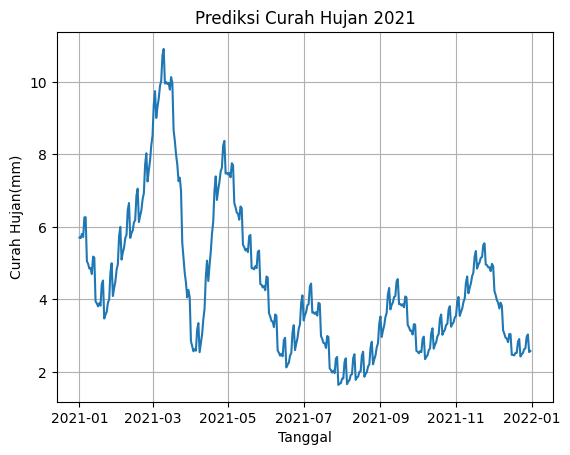

In [485]:
plt.plot(pred_res_2021['date'], pred_res_2021['RR'])
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan(mm)')
plt.grid(True)
plt.title('Prediksi Curah Hujan 2021')

Text(0.5, 1.0, 'Prediksi Kelembapan Udara  2021')

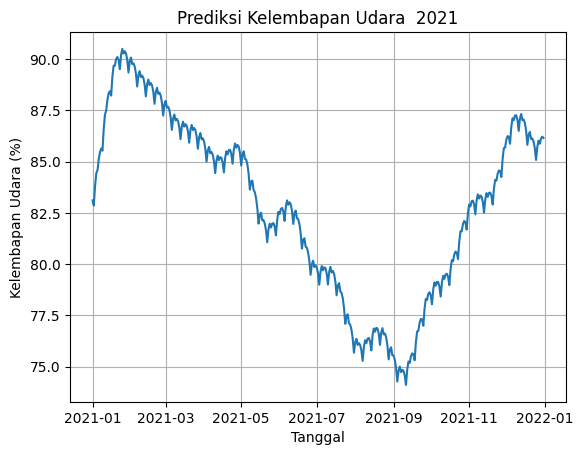

In [486]:
plt.plot(pred_res_2021['date'], pred_res_2021['RH_avg'])
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan Udara (%)')
plt.grid(True)
plt.title('Prediksi Kelembapan Udara  2021')

Text(0.5, 1.0, 'Prediksi Temperatur 2021')

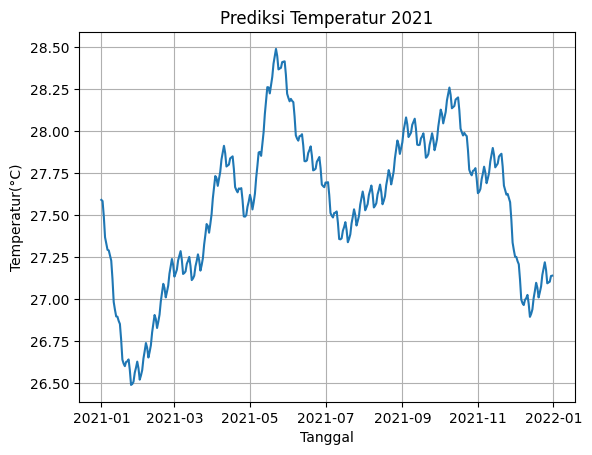

In [488]:
plt.plot(pred_res_2021['date'], pred_res_2021['Tavg'])
plt.xlabel('Tanggal')
plt.ylabel('Temperatur(°C)')
plt.grid(True)
plt.title('Prediksi Temperatur 2021')

Text(0.5, 1.0, 'Prediksi Durasi Cahaya Matahari 2021')

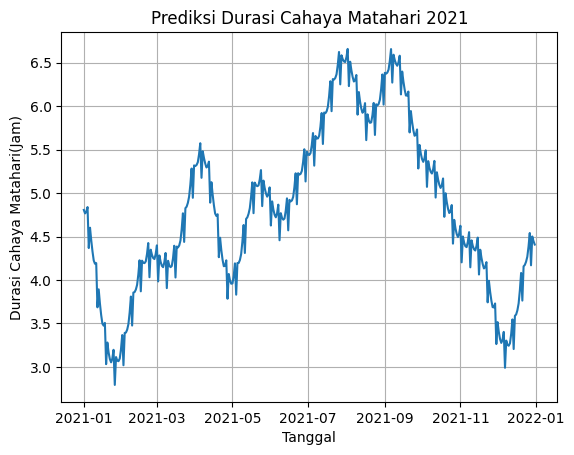

In [490]:
plt.plot(pred_res_2021['date'], pred_res_2021['ss'])
plt.xlabel('Tanggal')
plt.ylabel('Durasi Cahaya Matahari(Jam)')
plt.grid(True)
plt.title('Prediksi Durasi Cahaya Matahari 2021')

Text(0.5, 1.0, 'Prediksi Derajat Arah Angin 2021')

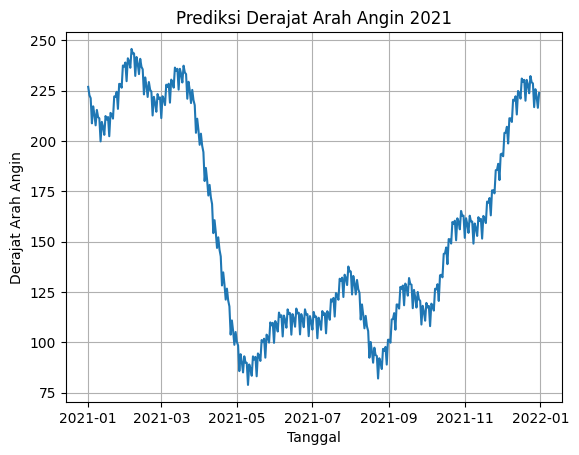

In [491]:
plt.plot(pred_res_2021['date'], pred_res_2021['ddd_x'])
plt.xlabel('Tanggal')
plt.ylabel('Derajat Arah Angin')
plt.grid(True)
plt.title('Prediksi Derajat Arah Angin 2021')

Text(0.5, 1.0, 'Prediksi Kecepatan Angin 2021')

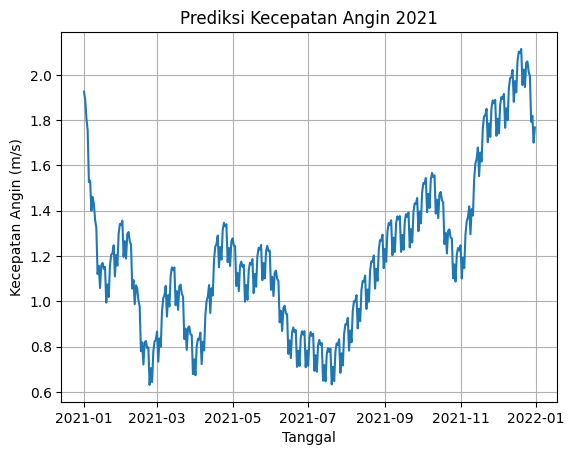

In [492]:
plt.plot(pred_res_2021['date'], pred_res_2021['ff_avg'])
plt.xlabel('Tanggal')
plt.ylabel('Kecepatan Angin (m/s)')
plt.grid(True)
plt.title('Prediksi Kecepatan Angin 2021')

In [411]:
pred_res_2021['region_name_Jakarta Selatan'] = 1
pred_res_2021['region_name_Jakarta Timur'] = 0
pred_res_2021['region_name_Jakarta Utara'] = 0

In [412]:
flood_predict_2021 = rf_tuning3.predict(pred_res_2021)
flood_predict_2021

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [508]:
res_flood_predict_2021 = pd.DataFrame(flood_predict_2021, index=date_range)

In [509]:
res_flood_predict_2021.rename(columns={0:'flood'}, inplace=True)
res_flood_predict_2021.head(10)

flood
2021-01-01      0
2021-01-02      0
2021-01-03      0
2021-01-04      0
2021-01-05      0
2021-01-06      0
2021-01-07      0
2021-01-08      0
2021-01-09      0
2021-01-10      1

# Deploy all the model

In [463]:
import pickle
with open('final_classify.pkl', 'wb') as f:
    pickle.dump(rf_tuning3, f)

In [464]:
ts_models = {
    'model_rr':model_RR2,
    'model_rh':model_RH,
    'model_ff':model_ff,
    'model_ss':model_ss,
    'model_ddd':model_ddd,
    'model_t':model_T
}

with open('final_time_series.pkl', 'wb') as f:
    pickle.dump(ts_models, f)

## Conclusion (Time Series)

- Model time series kita dapat memprediksi dengan cukup baik mengenai aspek-aspek cuaca yang akan terjadi di masa depan. Selain itu juga dengan menggunakan model klasifikasi sebelumnya kita juga berhasil memprediksi beberapa kejadian banjir berdasarkan aspek-aspek cuaca dari prediksi time series kita
- Selain itu model time series kita juga masih bisa ditingkatkan peformanya seperti menambah holiday dimana kita bisa menetapkan musim hujan pada bulan-bulan tertentu ataupun melakukan differencing secara manual

# What Insights we get ?

- Dengan data historis, ternyata kita bisa melakukan forecasting terhadap nilai data tersebut di masa depan menggunakan konsep Autoregressive, Mean Average, hingga dekomposisi